In [1]:
import pandas as pd
import numpy as np 
import os
import glob

import seaborn as sns
import matplotlib.pyplot as plt

### Importação dos dados e construção do dataframe consolidado

In [2]:
# 1. Caminho "raiz" onde estão as pastas de cada linguagem
caminho_base_resultados = r"C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados"

# 2. Lista das linguagens para incluir.
pastas_linguagens = ['C', 'C++','Python']

# 3. Lista para armazenar todos os DataFrames que encontrarmos
lista_dataframes = []

print(f"Iniciando varredura dinâmica em: {caminho_base_resultados}\n")

# 4. Loop por cada pasta de linguagem
for linguagem in pastas_linguagens:
    # 5. Cria o caminho completo para a pasta da linguagem 
    caminho_pasta_lang = os.path.join(caminho_base_resultados, linguagem)
    
    # 6. Cria o padrão de busca para encontrar TODOS os arquivos .csv
    padrao_busca = os.path.join(caminho_pasta_lang, "*.csv")
    
    print(f"--- Procurando arquivos em: {caminho_pasta_lang} ---")
    
    # 7. Usa 'glob' para encontrar todos os arquivos .csv no caminho
    arquivos_csv_encontrados = glob.glob(padrao_busca)
    
    if not arquivos_csv_encontrados:
        print("  -> Nenhum arquivo .csv encontrado nesta pasta.")
        continue

    # 8. Loop por cada arquivo .csv que foi encontrado
    for caminho_arquivo in arquivos_csv_encontrados:
        # Pega apenas o nome do arquivo (ex: 'resultados_heap_sort_c.csv')
        nome_arquivo = os.path.basename(caminho_arquivo)
        
        try:
            # Lê o arquivo usando o separador ';'
            df_temp = pd.read_csv(caminho_arquivo, sep=';')
            
            # Adiciona o DataFrame lido à nossa lista principal
            lista_dataframes.append(df_temp)
            
            print(f"  -> Arquivo '{nome_arquivo}' carregado com sucesso.")
            
        except Exception as e:
            print(f"  -> ERRO ao ler o arquivo {nome_arquivo}: {e}")

# 9. Unificar todos os DataFrames da lista em um só
if lista_dataframes:
    # 'pd.concat' une todos os DataFrames da lista
    df_completo = pd.concat(lista_dataframes, ignore_index=True)
    
    print("\n-------------------------------------------------")
    print("Sucesso! Todos os arquivos foram encontrados e unidos.")
    print("-------------------------------------------------")
    
    
    # Exibe as informações de verificação
    print("\nInformações do DataFrame:")
    df_completo.info()
    
    print("\nContagem por Linguagem:")
    print(df_completo['Linguagem'].value_counts())
    
else:
    print("\nNenhum arquivo CSV foi carregado. Verifique os caminhos e as pastas.")

Iniciando varredura dinâmica em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados

--- Procurando arquivos em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados\C ---
  -> Arquivo 'resultados_BubbleSort_C.csv' carregado com sucesso.
  -> Arquivo 'resultados_HeapSort_C.csv' carregado com sucesso.
  -> Arquivo 'resultados_InsertionSort_C.csv' carregado com sucesso.
  -> Arquivo 'resultados_MergeSort_C.csv' carregado com sucesso.
  -> Arquivo 'resultados_QuickSort_C.csv' carregado com sucesso.
  -> Arquivo 'resultados_SelectionSort_C.csv' carregado com sucesso.
--- Procurando arquivos em: C:\Users\edmag\OneDrive\Área de Trabalho\GitHub\TCC\Resultados\C++ ---
  -> Arquivo 'resultados_BubbleSort_C++.csv' carregado com sucesso.
  -> Arquivo 'resultados_HeapSort_C++.csv' carregado com sucesso.
  -> Arquivo 'resultados_InsertionSort_C++.csv' carregado com sucesso.
  -> Arquivo 'resultados_MergeSort_C++.csv' carregado com sucesso.
  -> Arquivo 'resultados_QuickSort_C+

In [3]:
display(df_completo)

,Linguagem,Algoritmo,Tamanho,Tempo,Repeticao
0,C,BubbleSort,100,0.000032,1
1,C,BubbleSort,100,0.000032,2
2,C,BubbleSort,100,0.000032,3
3,C,BubbleSort,100,0.000035,4
4,C,BubbleSort,100,0.000032,5
...,...,...,...,...,...
8186,Python,SelectionSort,100000,259.955026,98
8187,Python,SelectionSort,100000,261.420363,99
8188,Python,SelectionSort,100000,268.247094,100
8189,Python,SelectionSort,1000000,31708.645615,1


### Cálculo do z score 

In [4]:
df_limpo = df_completo.copy() 
df_limpo['Tempo'] = pd.to_numeric(df_limpo['Tempo'], errors='coerce')
df_limpo.dropna(subset=['Tempo'], inplace=True) 

print("DataFrame limpo e pronto.")

# --- Parte 1: Calcular o Z-score ---
# Agrupamos por cada combinação e usamos .transform() para aplicar 
# a média e o std de cada grupo a cada linha individual.

print("Calculando Z-scores...")
group_cols = ['Linguagem', 'Algoritmo', 'Tamanho']

# 1. Calcular a Média de cada grupo
df_limpo['Tempo_Mean'] = df_limpo.groupby(group_cols)['Tempo'].transform('mean')

# 2. Calcular o Desvio Padrão (std) de cada grupo
df_limpo['Tempo_Std'] = df_limpo.groupby(group_cols)['Tempo'].transform('std')

# 3. Calcular o Z-score
# (Valor - Média) / Desvio Padrão
df_limpo['Tempo_Zscore'] = (df_limpo['Tempo'] - df_limpo['Tempo_Mean']) / df_limpo['Tempo_Std']

# Substitui 'NaN' por 0 (acontece se o std for 0, ex: 100 testes idênticos)
df_limpo['Tempo_Zscore'].fillna(0, inplace=True)

print("Cálculo de Z-score concluído.")

DataFrame limpo e pronto.
Calculando Z-scores...
Cálculo de Z-score concluído.


In [5]:
display(df_limpo)

,Linguagem,Algoritmo,Tamanho,Tempo,Repeticao,Tempo_Mean,Tempo_Std,Tempo_Zscore
0,C,BubbleSort,100,0.000032,1,0.000034,0.000003,-0.769832
1,C,BubbleSort,100,0.000032,2,0.000034,0.000003,-0.769832
2,C,BubbleSort,100,0.000032,3,0.000034,0.000003,-0.769832
3,C,BubbleSort,100,0.000035,4,0.000034,0.000003,0.229950
4,C,BubbleSort,100,0.000032,5,0.000034,0.000003,-0.769832
...,...,...,...,...,...,...,...,...
8186,Python,SelectionSort,100000,259.955026,98,269.159053,13.974974,-0.658608
8187,Python,SelectionSort,100000,261.420363,99,269.159053,13.974974,-0.553753
8188,Python,SelectionSort,100000,268.247094,100,269.159053,13.974974,-0.065257
8189,Python,SelectionSort,1000000,31708.645615,1,31916.311435,293.683820,-0.707107


In [6]:
def plotar_boxplot_normalizado(df_normalizado, algoritmo_foco):
    """
    Gera gráficos de boxplot de Z-score lado a lado (um por linguagem) 
    para um algoritmo específico, agora COM CORES por linguagem
    E SALVA A FIGURA.
    """
    
    df_filtrado = df_normalizado[df_normalizado['Algoritmo'] == algoritmo_foco]

    if df_filtrado.empty:
        print(f"Nenhum dado encontrado para o algoritmo '{algoritmo_foco}'")
        return

    print(f"Gerando gráficos normalizados (com cor) para '{algoritmo_foco}'...")

    g = sns.catplot(
        data=df_filtrado,
        x='Tamanho',
        y='Tempo_Zscore',
        col='Linguagem',
        hue='Linguagem',    
        dodge=False,        
        kind='box',
        

        height=10,  
       
        
        aspect=1.1,
        showfliers=True
    )
    
    # Adiciona o grid
    for ax in g.axes.flat:
        ax.grid(which="both", ls="--", alpha=0.7)
        
    # ADIÇÃO 3: Adiciona a legenda
    # g.add_legend(title='Linguagem') 

    g.set_axis_labels('Tamanho do Vetor (N)', 'Tempo Normalizado (Z-score)')
    g.set_titles(col_template="{col_name}", size=14) 
    g.fig.suptitle(f'Consistência Relativa da Execução do Algoritmo - {algoritmo_foco}', 
                     y=1.05, fontsize=18)

    g.tight_layout()
    
    nome_arquivo_limpo = algoritmo_foco.replace(' ', '_').lower()
    nome_arquivo_final = f"grafico_consistencia_{nome_arquivo_limpo}.png"
    
    g.savefig(nome_arquivo_final, dpi=300, bbox_inches='tight')
    
    print(f"Gráfico salvo como: {nome_arquivo_final}")
    
    plt.show()

Gerando gráficos normalizados (com cor) para 'BubbleSort'...
Gráfico salvo como: grafico_consistencia_bubblesort.png


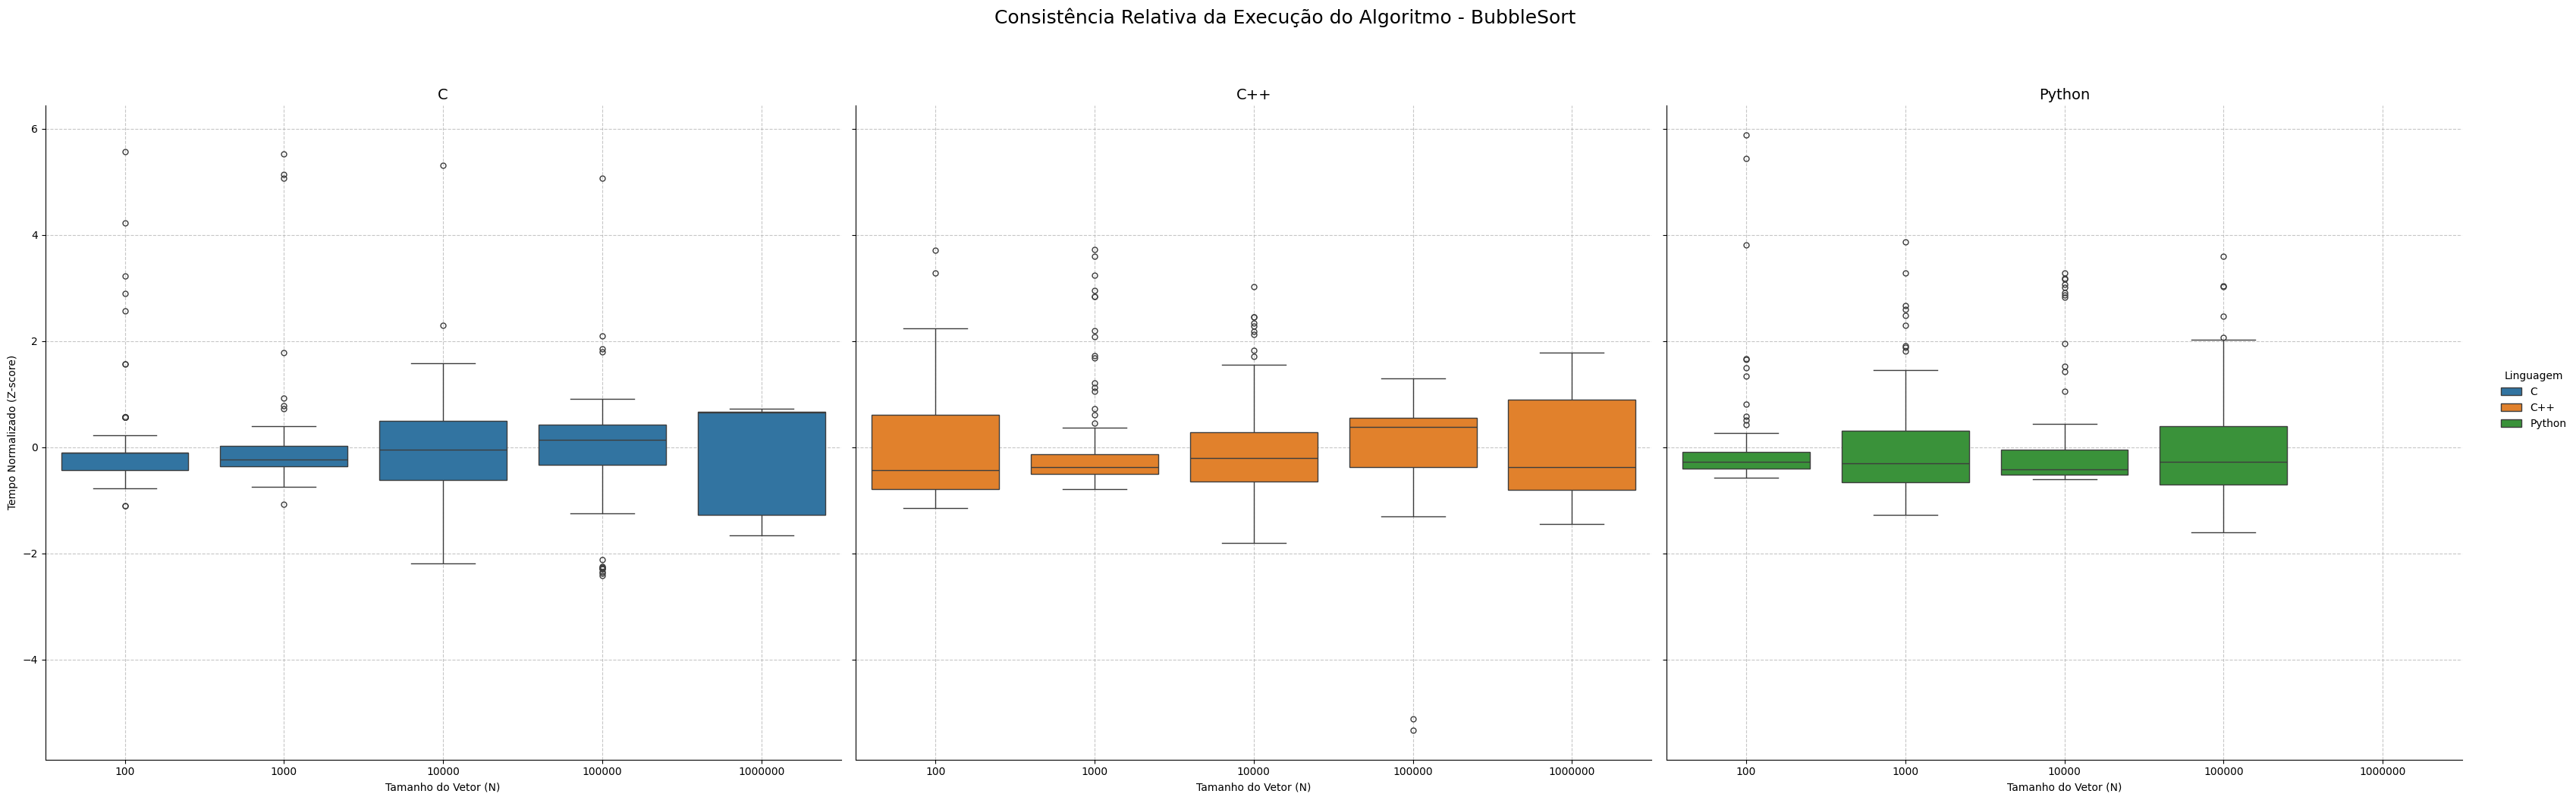

Gerando gráficos normalizados (com cor) para 'InsertionSort'...
Gráfico salvo como: grafico_consistencia_insertionsort.png


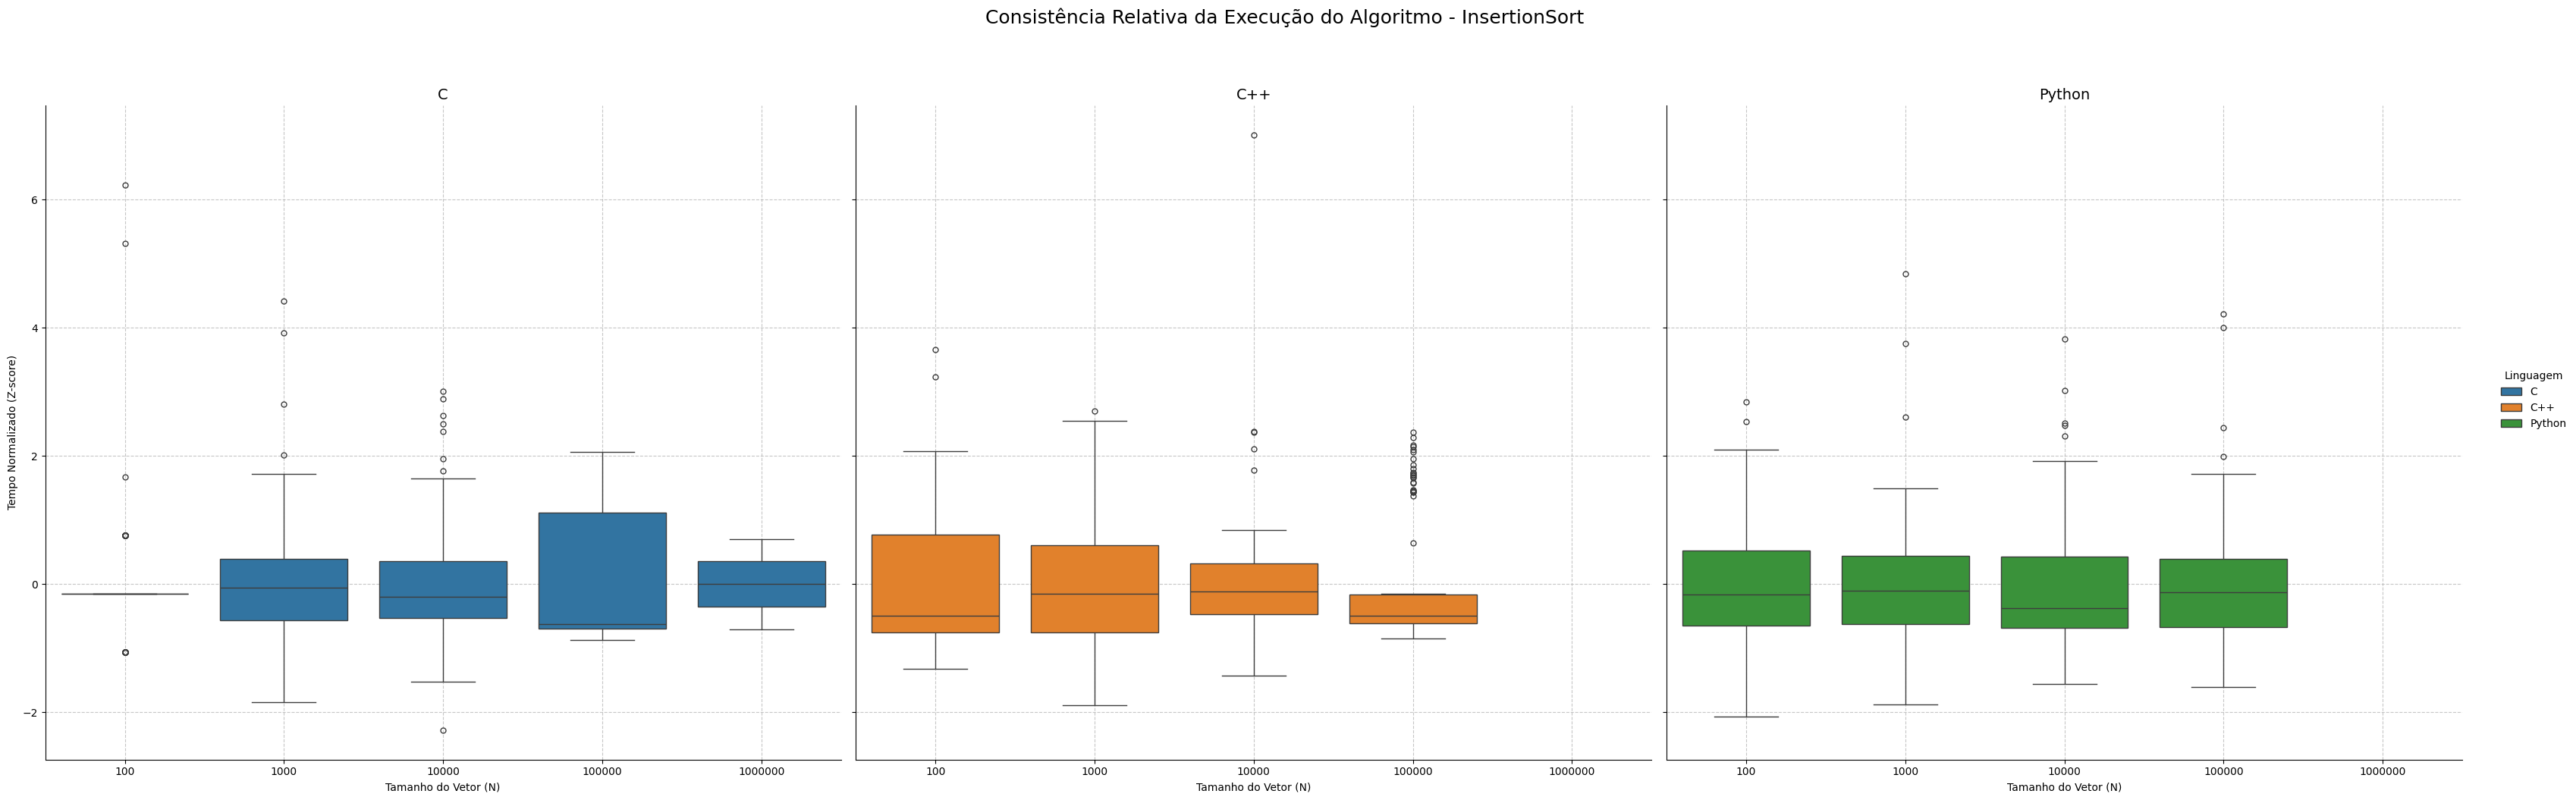

Gerando gráficos normalizados (com cor) para 'SelectionSort'...
Gráfico salvo como: grafico_consistencia_selectionsort.png


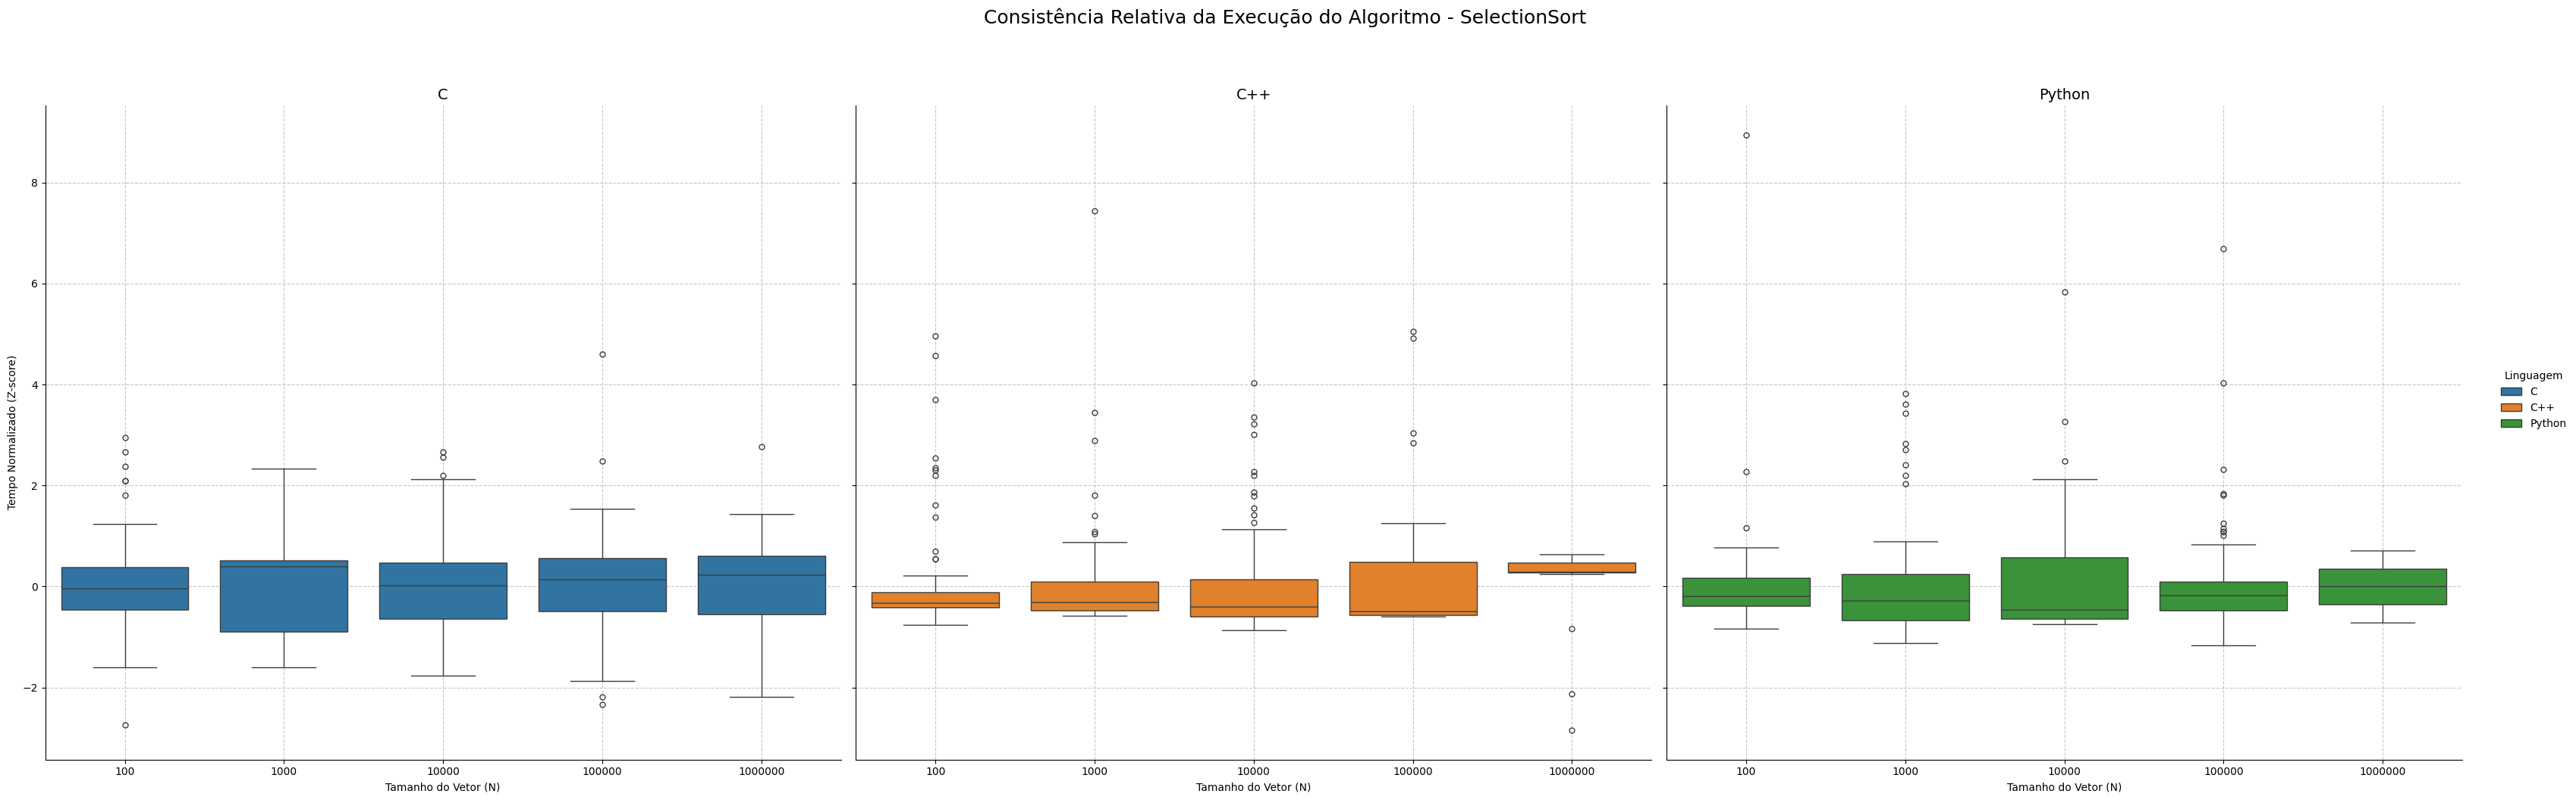

Gerando gráficos normalizados (com cor) para 'MergeSort'...
Gráfico salvo como: grafico_consistencia_mergesort.png


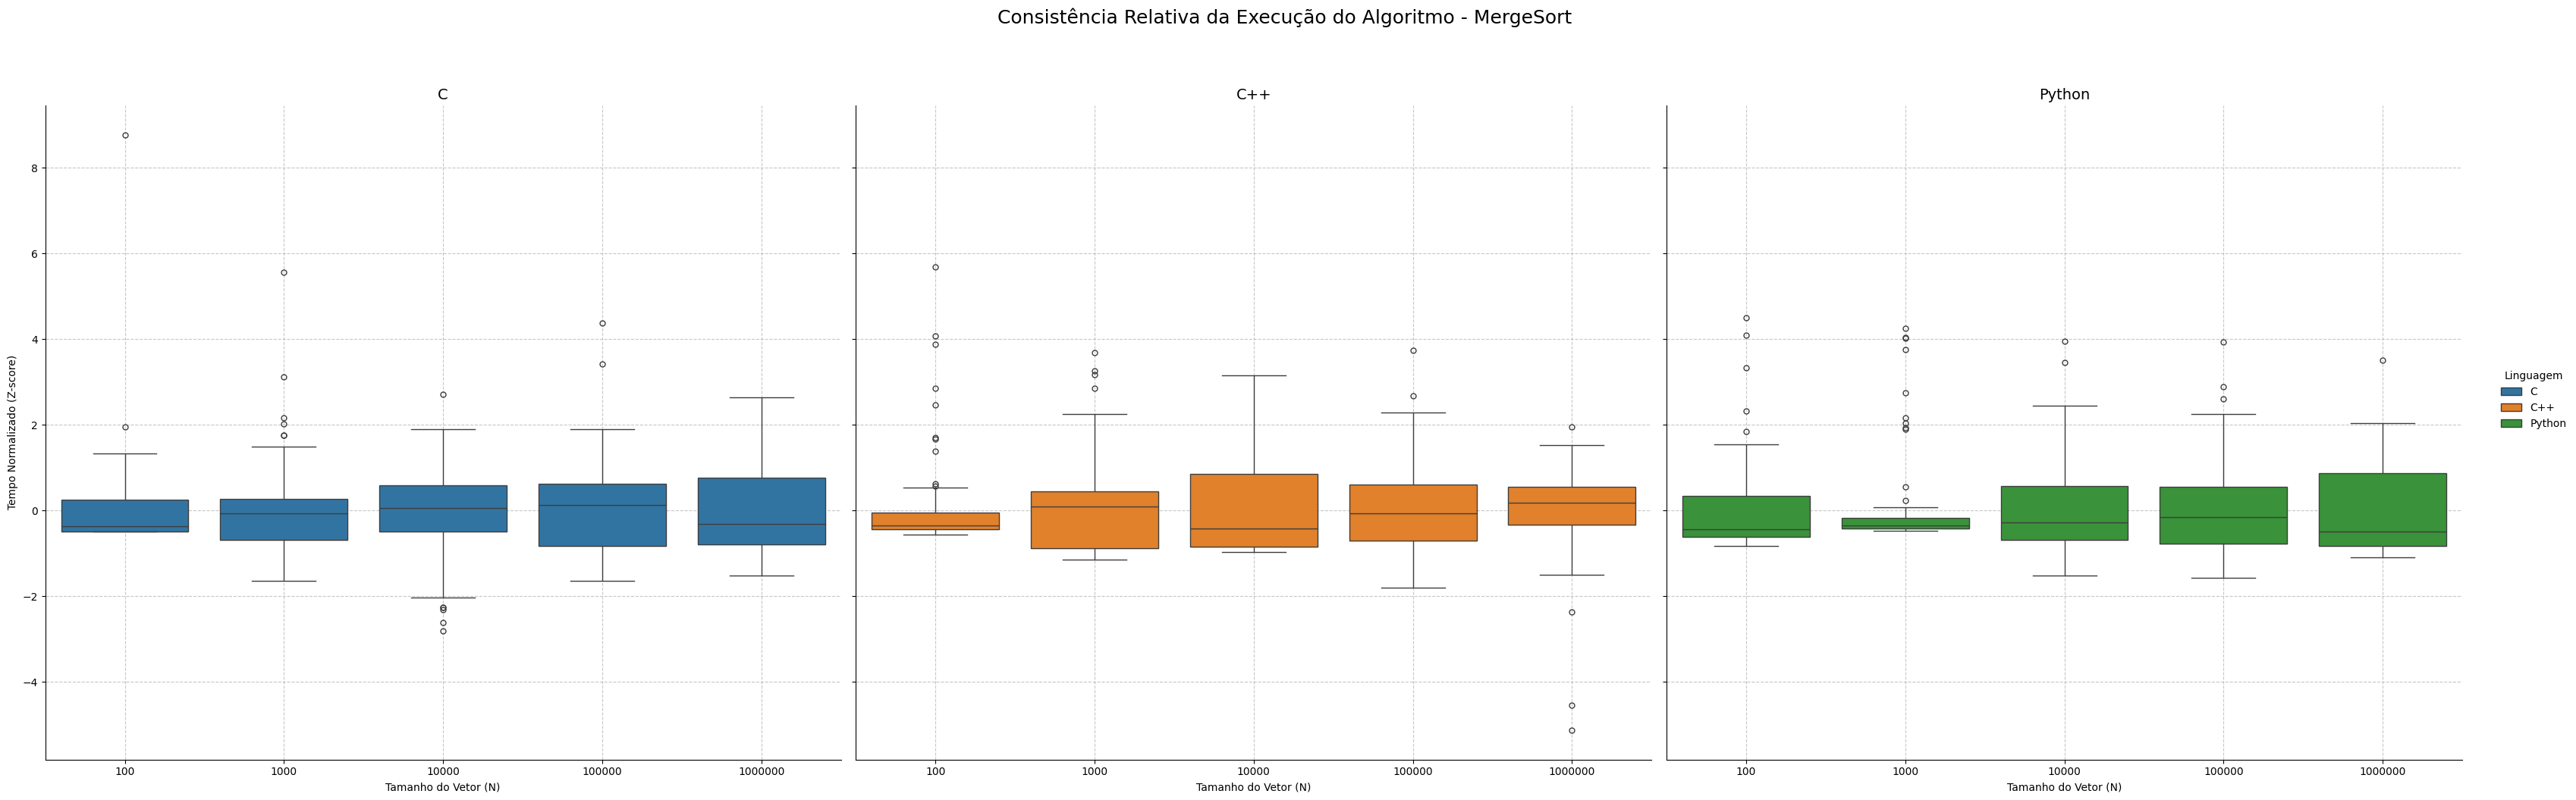

Gerando gráficos normalizados (com cor) para 'QuickSort'...
Gráfico salvo como: grafico_consistencia_quicksort.png


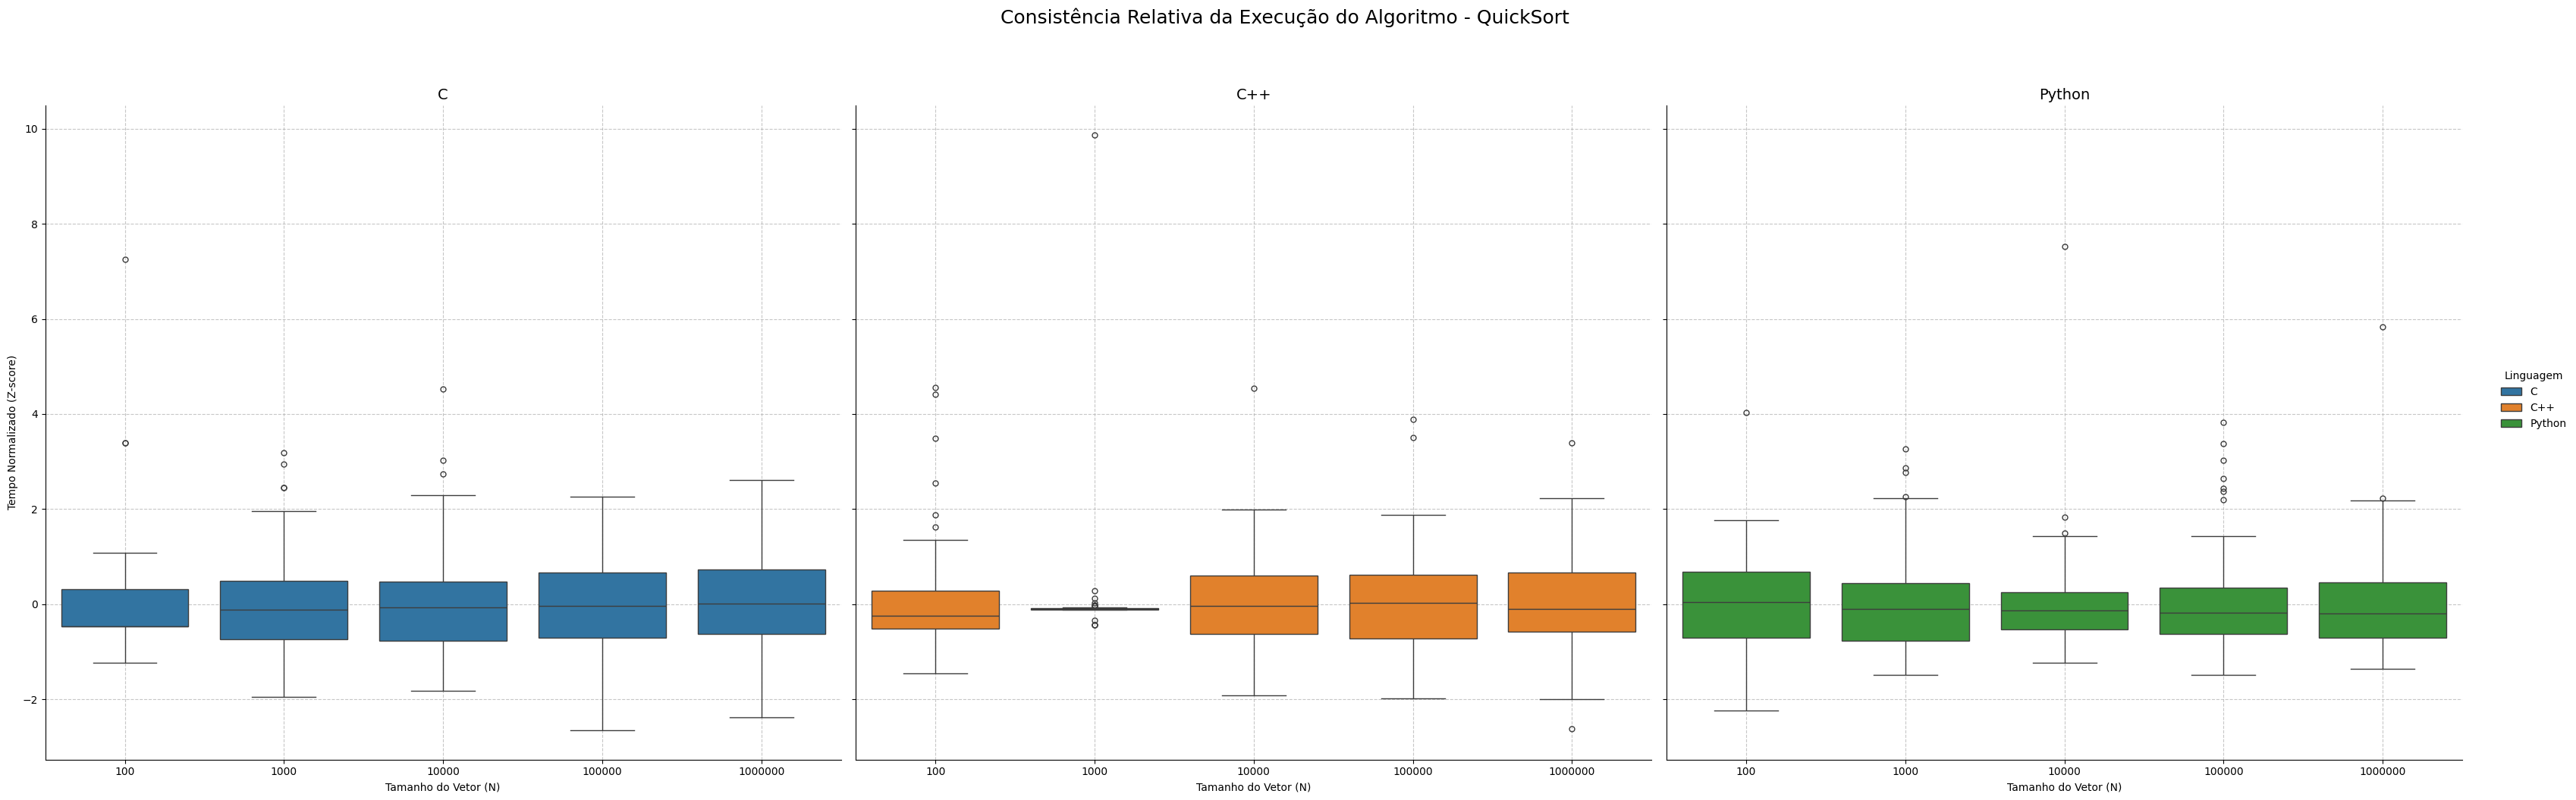

Gerando gráficos normalizados (com cor) para 'HeapSort'...
Gráfico salvo como: grafico_consistencia_heapsort.png


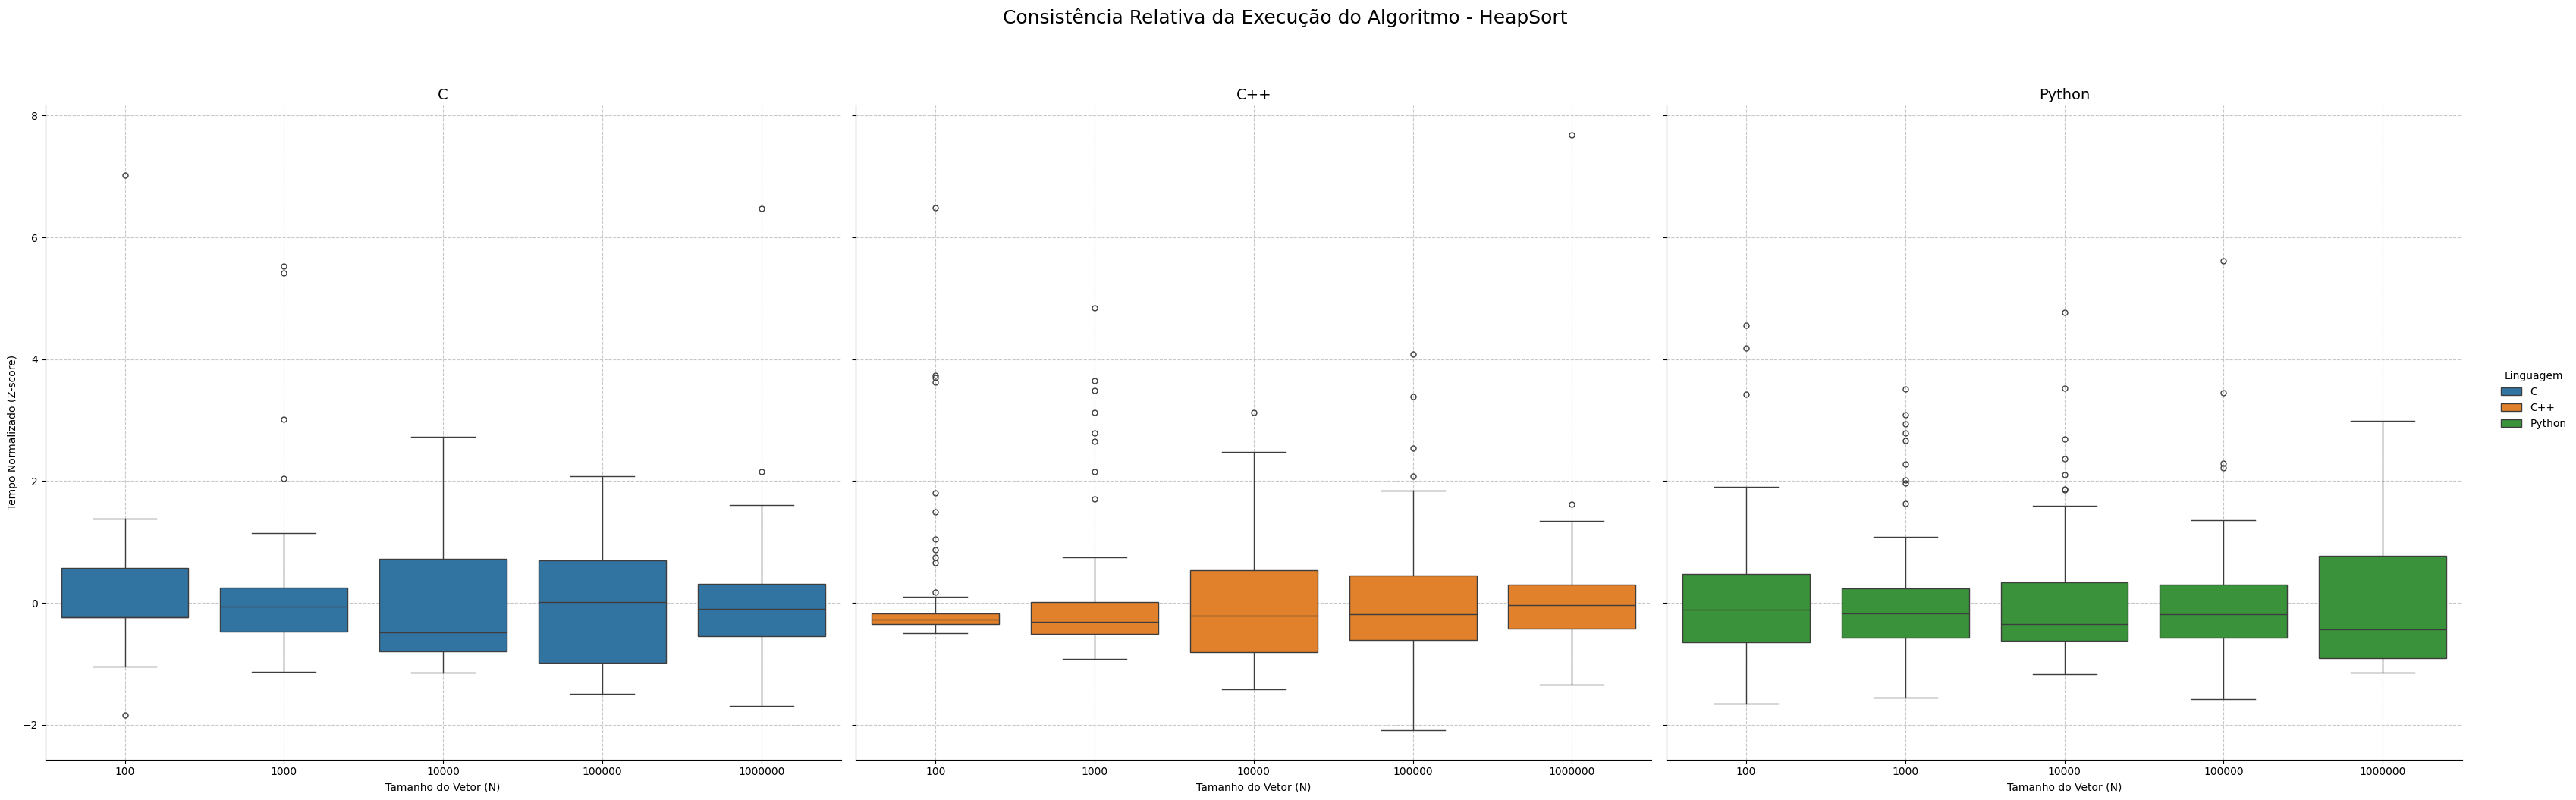

In [7]:
plotar_boxplot_normalizado(df_limpo, "BubbleSort")
plotar_boxplot_normalizado(df_limpo, "InsertionSort")
plotar_boxplot_normalizado(df_limpo, "SelectionSort")
plotar_boxplot_normalizado(df_limpo, "MergeSort")
plotar_boxplot_normalizado(df_limpo, "QuickSort")
plotar_boxplot_normalizado(df_limpo, "HeapSort")

Foram gerados gráficos de boxplot de Z-score para todos os seis algoritmos implementados. As Figuras acima revelam um padrão em todos os algoritmos e linguagens, a assimetria Positiva. Ou seja, nenhuma das distribuições de tempo é simétrica. Todas apresentam uma clara assimetria à direita. A prova visual desta assimetria é a presença constante de outliers com Z-scores positivos (ex: +2, +4, +8, e em alguns casos, como o QuickSort em C, superiores a +10). Em contrapartida, a cauda negativa das distribuições é menor. Observam-se poucos outliers negativos, e os que existem estão muito próximos da caixa (ex: Z-score -2).

Esta evidência valida a hipótese de que as interferências do sistema operacional criam medições atipicamente lentas, mas é menos provável que o sistema "ajude" um algoritmo a rodar significativamente mais rápido que seu desempenho ótimo.

A presença desta forte assimetria positiva comprova que o uso da Média seria uma escolha metodológica incorreta para este conjunto de dados. A média seria inflada por esses outliers, resultando em um valor que não representa o desempenho típico do algoritmo, mas sim um desempenho corrompido por interferências externas. A Mediana, por ser uma estatística robusta, ignora a magnitude desses valores extremos e representa, de forma mais honesta, o valor central da distribuição, o percentil 50. Ela nos diz qual foi o tempo de execução "típico" do algoritmo quando não estava sendo significativamente interrompido.

Portanto, para garantir uma análise mais justa, a Mediana foi escolhida como a principal métrica de desempenho em todas as análises deste trabalho.

Cálculo da mediana concluído.
Gerando gráfico da Análise 1 (Complexidade Teórica)...


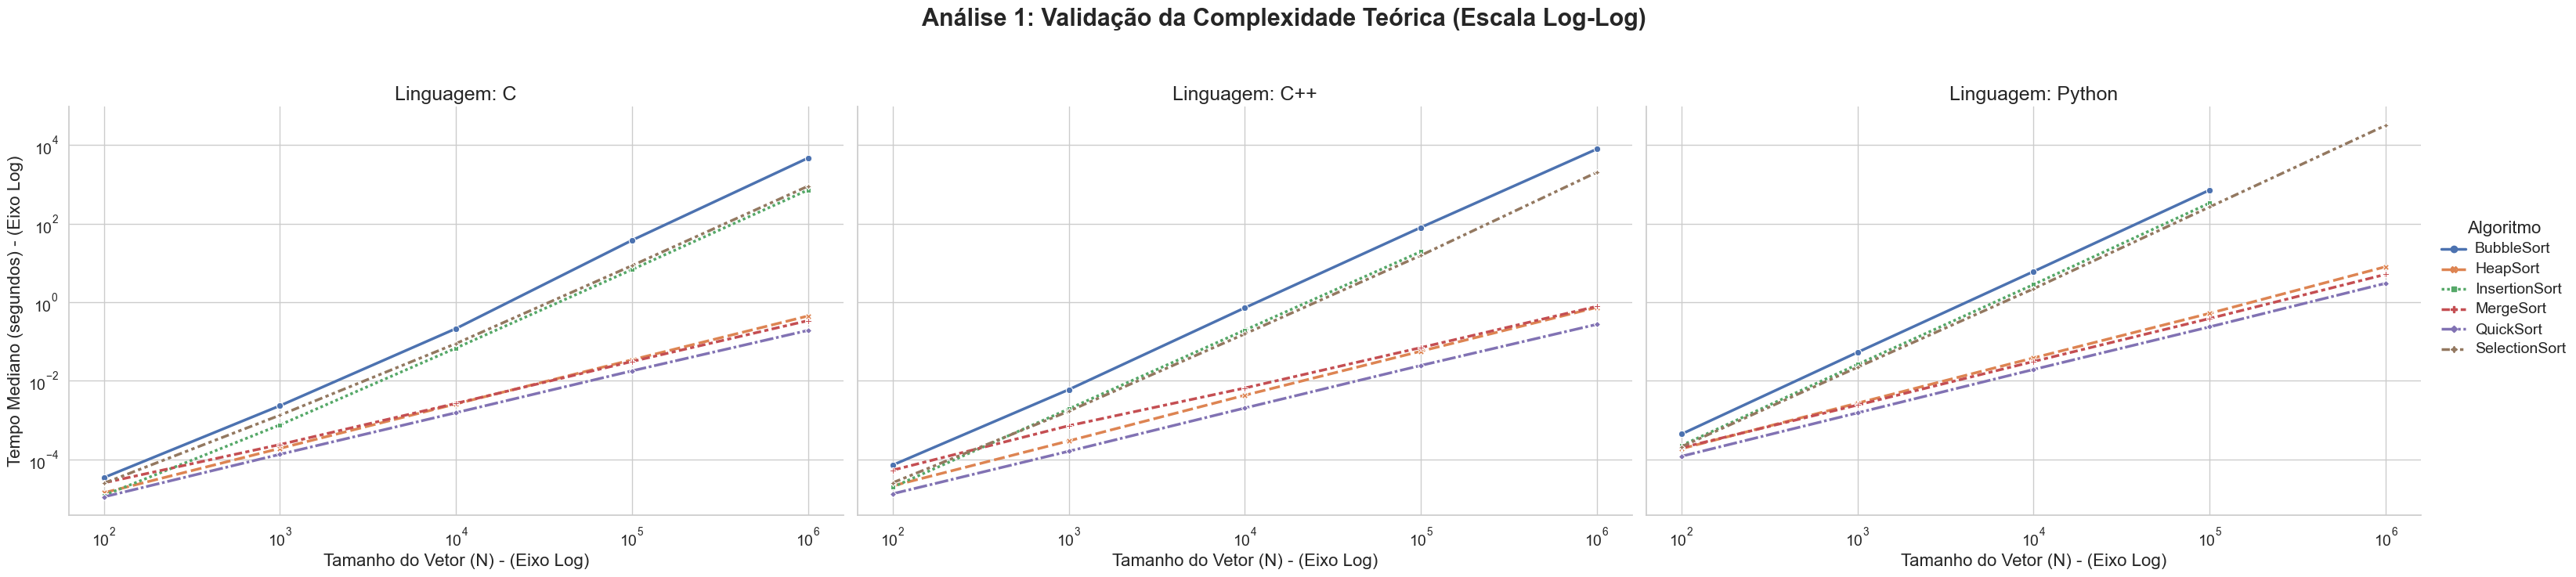

In [8]:
# --- Pré-requisito: Calcular o df_media ---
df_mediana = df_limpo.groupby(
    ['Linguagem', 'Algoritmo', 'Tamanho']
)['Tempo'].median().reset_index()

df_mediana = df_mediana.rename(columns={'Tempo': 'TempoMediano'})

print("Cálculo da mediana concluído.")

# --- Passo 2: Gerar o Gráfico de Complexidade (Log-Log) ---

print("Gerando gráfico da Análise 1 (Complexidade Teórica)...")

# Define um tema com grid (como você já tinha)
sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=df_mediana,
    x='Tamanho',          
    y='TempoMediano',     
    hue='Algoritmo',      
    style='Algoritmo',    
    col='Linguagem',      
    kind='line',          
    lw=2.5, # Grossura da linha (está bom)              
    markers=True,         
    height=7,             # Altura
    aspect=1.5            # Largura
)

# Aplicar as escalas Logarítmicas
g.set(xscale='log', yscale='log')


# --- MUDANÇAS AQUI: AUMENTANDO AS FONTES ---

# 1. Ajustar Títulos e Rótulos dos Eixos
g.set_axis_labels(
    'Tamanho do Vetor (N) - (Eixo Log)', 
    'Tempo Mediano (segundos) - (Eixo Log)', 
    fontsize=16 # <--- Aumentado
)

# 2. Ajustar Títulos dos Sub-gráficos (C, C++, Python)
g.set_titles(col_template="Linguagem: {col_name}", size=18) # <--- Aumentado

# 3. Ajustar Título Principal
g.fig.suptitle('Análise 1: Validação da Complexidade Teórica (Escala Log-Log)', 
                 y=1.05, fontsize=22, weight='bold') # <--- Aumentado

# 4. Aumentar os Números dos Eixos (ex: 10^2, 10^4)
g.tick_params(labelsize=14) # <--- Aumentado

# 5. Aumentar a Legenda
if g._legend:
    # Aumenta o texto (BubbleSort, HeapSort, etc)
    plt.setp(g._legend.get_texts(), fontsize='14') 
    # Aumenta o título da legenda (Algoritmo)
    plt.setp(g._legend.get_title(), fontsize='16') 

# --- FIM DAS MUDANÇAS ---

# Ajusta o layout
g.tight_layout()

# Mostrar o gráfico
plt.show()

# Para salvar a imagem (opcional)
# g.savefig('analise1_complexidade_log_log.png', dpi=300, bbox_inches='tight')

Ao observar os gráficos para cada linguagem, um padrão claro e consistente é
demonstrado:

Os algoritmos BubbleSort, InsertionSort e SelectionSort, por terem Complexidade
Quadrática (O(n2)), formam um grupo distinto. Suas linhas de tendência são
visivelmente mais inclinadas e são aproximadamente paralelas entre si. Isso
indica uma taxa de crescimento de tempo de execução mais alta, o que corrobora
sua complexidade teórica de O(n2)

Complexidade Log-Linear (O(n log n)): Em nítido contraste, os algoritmos Merge-
Sort, QuickSort e HeapSort formam um segundo grupo. Suas linhas de tendência
são significativamente menos inclinadas, e também são paralelas entre si. Isso
demonstra uma taxa de crescimento muito mais eficiente e valida suas complexi-
dades teóricas de O(n log n).
A clara separação visual desses dois grupos de complexidade em todas as
três linguagens testadas fornece uma forte validação experimental. Os dados
coletados refletem com precisão o comportamento de complexidade de tempo
esperado para cada algoritmo.

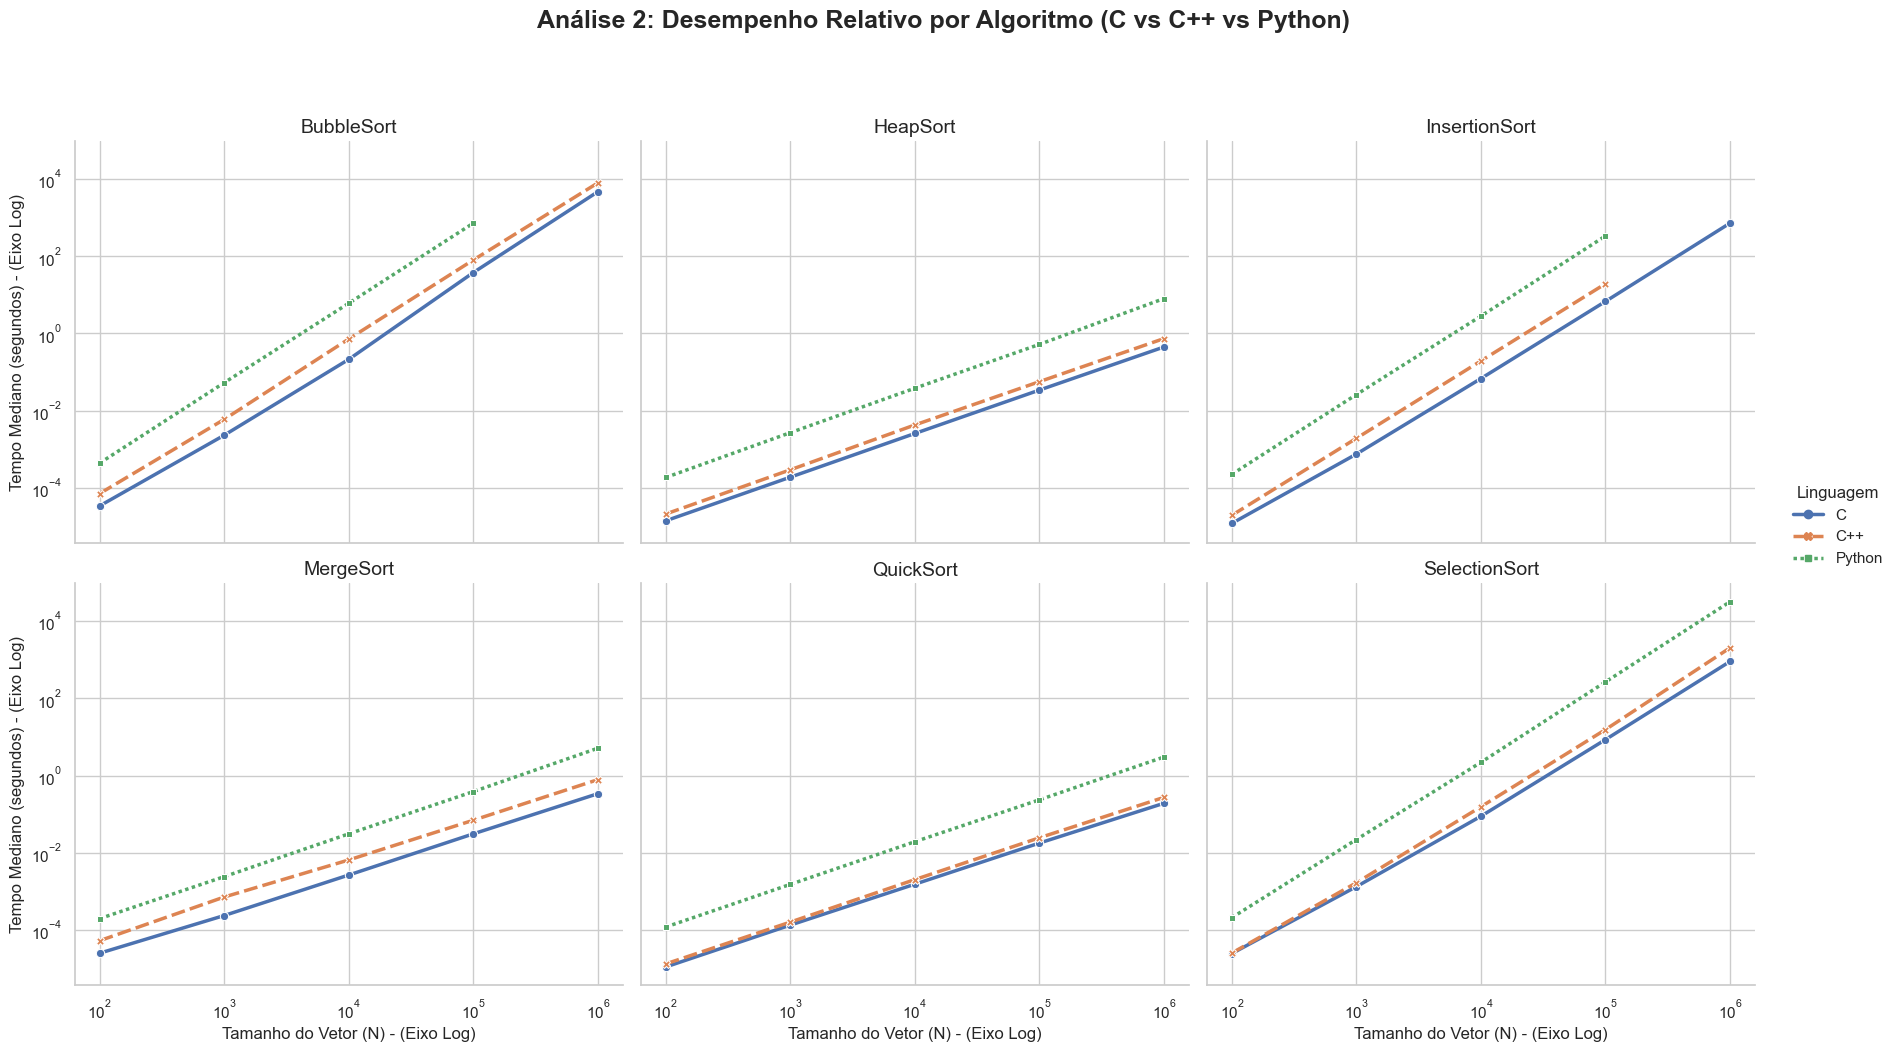

In [9]:
# Define o tema
sns.set_theme(style="whitegrid")

# --- O Gráfico da Análise 2 ---
g = sns.relplot(
    data=df_mediana,
    x='Tamanho',          # Eixo X: Tamanho do vetor
    y='TempoMediano',     # Eixo Y: Tempo MEDIANO
    hue='Linguagem',      # <--- MUDANÇA: Cor por Linguagem
    style='Linguagem',    # Estilo por Linguagem
    col='Algoritmo',      # <--- MUDANÇA: Colunas por Algoritmo
    col_wrap=3,           # <--- Quebra a linha a cada 3 gráficos (para não ficar muito largo)
    kind='line',          # Tipo de gráfico
    lw=2.5,               # Grossura da linha
    markers=True,         # Adiciona marcadores nos pontos de dados
    height=5,             # Altura de CADA gráfico
    aspect=1.2            # Proporção: largura = 1.2 * altura
)

# Aplicar as escalas Logarítmicas
g.set(xscale='log', yscale='log')

# Ajustar títulos e rótulos
g.set_axis_labels('Tamanho do Vetor (N) - (Eixo Log)', 'Tempo Mediano (segundos) - (Eixo Log)')
g.set_titles(col_template="{col_name}", size=14) # {col_name} é BubbleSort, MergeSort, etc.
g.fig.suptitle('Análise 2: Desempenho Relativo por Algoritmo (C vs C++ vs Python)', 
                 y=1.05, fontsize=18, weight='bold')

# Ajusta o layout
g.tight_layout()

# Mostrar o gráfico
plt.show()

# Para salvar a imagem (opcional)
g.savefig('analise2_linguagens_vs_linguagens.png', dpi=300)

Para isolar o desempenho de cada algoritmo, o gráfico acima permite uma
comparação direta, lado a lado, do desempenho das linguagens para a mesma
tarefa computacional. A análise dos 6 sub-gráficos revela um resultado unânime
e conclusivo em todos os cenários testados:
40
– Superioridade de C/C++: Em todos os algoritmos, sem exceção, as linhas
de desempenho de C e C++ estão agrupadas na parte inferior do gráfico,
indicando tempos de execução mais rápidos que o Python.
– Desempenho de C vs. C++: As linhas de C e C++ estão bem próximas
uma da outra, com uma diferença de desempenho pequena entre elas, isso
demonstra a velocidade de execução, quando comparada uma linguagem de
programação compilada com outra linguagem de programação compilada.
– O "Custo"do Python: A linha de desempenho do Python situa-se significati-
vamente acima das demais. A distância vertical entre a linha do Python e as
linhas de C/C++ aumenta visivelmente conforme o Tamanho (N) cresce. Isso
demonstra que o custo da linguagem interpretada, não é um fator constante;
ele se torna um gargalo de desempenho cada vez mais significativo à medida
que a complexidade do problema (N) aumenta.
Os resultados visuais demonstram que C e C++ são dominantemente supe-
riores ao Python em termos de velocidade de execução.

In [10]:
# 1. Isolar o Baseline (o tempo do C)
df_baseline_c = df_mediana[df_mediana['Linguagem'] == 'C'].copy()
df_baseline_c.rename(columns={'TempoMediano': 'Tempo_C_Baseline'}, inplace=True)
df_baseline_c = df_baseline_c[['Algoritmo', 'Tamanho', 'Tempo_C_Baseline']]


# 2. Juntar (Merge) o baseline com todos os dados ---
df_ratio = pd.merge(
    df_mediana,
    df_baseline_c,
    on=['Algoritmo', 'Tamanho'],
    how='left'
)

# 3. Calcular o Aumento Percentual
# Fórmula: ( (TempoMediano - Tempo_C_Baseline) / Tempo_C_Baseline ) * 100
df_ratio['Aumento_Percentual_vs_C (%)'] = (
    (df_ratio['TempoMediano'] - df_ratio['Tempo_C_Baseline']) / df_ratio['Tempo_C_Baseline']
) * 100


# 4. Preparar a Tabela Final
tamanho_foco = df_ratio['Tamanho'].max() 
print(f"Filtrando resultados para o maior tamanho: N = {tamanho_foco}")

df_tabela_final = df_ratio[df_ratio['Tamanho'] == tamanho_foco].copy()

# Selecionar e ordenar as colunas para clareza
colunas_finais = [
    'Algoritmo', 
    'Linguagem', 
    'TempoMediano',
    'Aumento_Percentual_vs_C (%)' # Nova coluna!
]

df_tabela_final = df_tabela_final[colunas_finais].sort_values(
    by=['Algoritmo', 'TempoMediano'] 
)

# 5. Exibir a Tabela de Resultados
print("\n--- ANÁLISE 3: TABELA DE AUMENTO PERCENTUAL DE TEMPO ---")
print(f"Comparação para N = {tamanho_foco} (Baseline: C = 0%)\n")

# Configura o Pandas para formatar os números
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

print(df_tabela_final)

Filtrando resultados para o maior tamanho: N = 1000000

--- ANÁLISE 3: TABELA DE AUMENTO PERCENTUAL DE TEMPO ---
Comparação para N = 1000000 (Baseline: C = 0%)

        Algoritmo Linguagem  TempoMediano  Aumento_Percentual_vs_C (%)
4      BubbleSort         C      4,703.47                         0.00
34     BubbleSort       C++      7,957.09                        69.17
9        HeapSort         C          0.45                         0.00
39       HeapSort       C++          0.74                        65.25
67       HeapSort    Python          8.01                     1,695.93
14  InsertionSort         C        722.74                         0.00
19      MergeSort         C          0.34                         0.00
48      MergeSort       C++          0.78                       131.08
76      MergeSort    Python          5.11                     1,406.83
24      QuickSort         C          0.19                         0.00
53      QuickSort       C++          0.27                 

## BACKUP DE ANÁLISES

In [11]:
df_agregado = df_limpo.groupby(
    ['Linguagem', 'Algoritmo', 'Tamanho']
)['Tempo'].agg(
    Tempo_Medio='mean', 
    Tempo_Mediano='median'
).reset_index()

# Adiciona a diferença percentual
df_agregado['Diferenca_Percentual'] = 100 * (df_agregado['Tempo_Medio'] - df_agregado['Tempo_Mediano']) / df_agregado['Tempo_Mediano']

In [12]:
display(df_agregado)

,Linguagem,Algoritmo,Tamanho,Tempo_Medio,Tempo_Mediano,Diferenca_Percentual
0,C,BubbleSort,100,0.00,0.00,0.91
1,C,BubbleSort,1000,0.00,0.00,1.32
2,C,BubbleSort,10000,0.21,0.21,0.03
3,C,BubbleSort,100000,37.63,37.77,-0.36
4,C,BubbleSort,1000000,"4,485.03","4,703.47",-4.64
...,...,...,...,...,...,...
82,Python,SelectionSort,100,0.00,0.00,1.64
83,Python,SelectionSort,1000,0.02,0.02,0.76
84,Python,SelectionSort,10000,2.28,2.20,3.66
85,Python,SelectionSort,100000,269.16,266.74,0.91


### Análise estatística dos dados importados

In [13]:
# Agrupar os dados e calcular as estatísticas
# Para cada (Linguagem, Algoritmo, Tamanho), calculamos a média, mediana e desvio padrão do Tempo
df_agregado = df_completo.groupby(['Linguagem', 'Algoritmo', 'Tamanho'])['Tempo'].agg(['mean', 'median', 'std']).reset_index()

df_agregado.rename(columns={'mean': 'Tempo_Medio', 'median': 'Tempo_Mediano', 'std': 'Desvio_Padrao'}, inplace=True)

print("DataFrame agregado com as estatísticas:")
display(df_agregado)

DataFrame agregado com as estatísticas:


,Linguagem,Algoritmo,Tamanho,Tempo_Medio,Tempo_Mediano,Desvio_Padrao
0,C,BubbleSort,100,0.00,0.00,0.00
1,C,BubbleSort,1000,0.00,0.00,0.00
2,C,BubbleSort,10000,0.21,0.21,0.00
3,C,BubbleSort,100000,37.63,37.77,1.00
4,C,BubbleSort,1000000,"4,485.03","4,703.47",330.59
...,...,...,...,...,...,...
82,Python,SelectionSort,100,0.00,0.00,0.00
83,Python,SelectionSort,1000,0.02,0.02,0.00
84,Python,SelectionSort,10000,2.28,2.20,0.17
85,Python,SelectionSort,100000,269.16,266.74,13.97


In [14]:
# 1. Calcular o Tempo Médio
print("Calculando tempos médios...")
df_media = df_completo.groupby(
    ['Linguagem', 'Algoritmo', 'Tamanho']
)['Tempo'].mean().reset_index()

# 2. Ordenar os valores
df_media = df_media.sort_values(by=['Linguagem', 'Algoritmo', 'Tamanho'])

# 3. Criar a coluna 'Tempo_Anterior'
print("Calculando tempo anterior...")
df_media['Tempo_Anterior'] = df_media.groupby(
    ['Linguagem', 'Algoritmo']
)['Tempo'].shift(1) # '1' significa "pegar 1 linha acima"

# 4. Calcular o 'FatorDeAumento'
print("Calculando fator de aumento...")
df_media['FatorDeAumento'] = df_media['Tempo'] / df_media['Tempo_Anterior']


print("\n--- Análise de Fator de Aumento Concluída ---")

# 5. Exibir a tabela de análise
df_media = df_media.rename(columns={'Tempo': 'TempoMedio'})

print(df_media[
    ['Linguagem', 'Algoritmo', 'Tamanho', 'TempoMedio', 'FatorDeAumento']
].to_string()) # .to_string() garante que todas as linhas sejam impressas

Calculando tempos médios...
Calculando tempo anterior...
Calculando fator de aumento...

--- Análise de Fator de Aumento Concluída ---
   Linguagem      Algoritmo  Tamanho  TempoMedio  FatorDeAumento
0          C     BubbleSort      100        0.00             NaN
1          C     BubbleSort     1000        0.00           68.12
2          C     BubbleSort    10000        0.21           91.13
3          C     BubbleSort   100000       37.63          176.68
4          C     BubbleSort  1000000    4,485.03          119.17
5          C       HeapSort      100        0.00             NaN
6          C       HeapSort     1000        0.00           13.29
7          C       HeapSort    10000        0.00           14.78
8          C       HeapSort   100000        0.03           12.14
9          C       HeapSort  1000000        0.45           13.14
10         C  InsertionSort      100        0.00             NaN
11         C  InsertionSort     1000        0.00           61.71
12         C  Insert

In [15]:
def gerar_boxplot_por_algoritmo(nome_algoritmo, 
                                df_fonte, 
                                linguagens_desejadas=['C', 'C++', 'Python'],
                                salvar_imagem=True):
    """
    Gera e exibe um gráfico de boxplot comparativo lado a lado 
    (um por linguagem) para um algoritmo específico, agrupado por tamanho.

    Argumentos:
    nome_algoritmo (str): O nome exato do algoritmo para filtrar (ex: 'MergeSort').
    df_fonte (pd.DataFrame): O DataFrame completo contendo todos os dados brutos.
    linguagens_desejadas (list): Lista de strings das linguagens a plotar.
    salvar_imagem (bool): Se True, salva a imagem em um arquivo .png.
    """
    
    # --- 1. Verificações Iniciais ---
    if 'df_fonte' not in locals() and 'df_fonte' not in globals():
        print(f"ERRO: O DataFrame 'df_fonte' não foi encontrado.", file=sys.stderr)
        return

    print(f"Iniciando geração de gráfico para o algoritmo: '{nome_algoritmo}'...")
    
    # --- 2. Filtragem e Preparação ---
    try:
        df_filtrado = df_fonte[df_fonte['Algoritmo'] == nome_algoritmo].copy()

        if df_filtrado.empty:
            print(f"AVISO: Nenhum dado encontrado para '{nome_algoritmo}'. Gráfico não gerado.")
            return

        df_filtrado['Tamanho'] = df_filtrado['Tamanho'].astype(str)
        
        ordem_tamanhos = sorted(df_filtrado['Tamanho'].unique(), key=int)
        
    except Exception as e:
        print(f"ERRO durante a filtragem ou preparação dos dados: {e}", file=sys.stderr)
        return

    # --- 3. Criação dos Gráficos ---
    
    num_linguagens = len(linguagens_desejadas)
    cores = ['lightblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightgray'] # Cores base
    
    fig, axes = plt.subplots(nrows=1, ncols=num_linguagens, 
                             figsize=(7 * num_linguagens, 8), 
                             sharey=False)

    if num_linguagens == 1:
        axes = [axes]

    for i, lang in enumerate(linguagens_desejadas):
        ax = axes[i] 
        cor = cores[i % len(cores)] 
        
        df_lang = df_filtrado[df_filtrado['Linguagem'] == lang]
        
        if not df_lang.empty:
            sns.boxplot(x='Tamanho', y='Tempo', data=df_lang, ax=ax,
                        color=cor, order=ordem_tamanhos)
            
            ax.set_yscale('log')
            
            ax.set_title(f'Performance do {nome_algoritmo} em {lang}', fontsize=16)
            ax.set_xlabel('Tamanho do Vetor', fontsize=12)
            ax.set_ylabel('Tempo (segundos) - Escala Log', fontsize=12)
            ax.grid(True, linestyle='--', alpha=0.6, which='both')
        else:
            ax.set_title(f'{nome_algoritmo} em {lang}\n(Sem Dados)', fontsize=16)

    fig.suptitle(f'Comparação de Performance: {nome_algoritmo} (Agrupado por Tamanho)', fontsize=20, y=1.03)

    # Ajusta o layout para evitar sobreposição
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])

    if salvar_imagem:
        nome_arquivo_seguro = nome_algoritmo.lower().replace(' ', '_').replace('.', '')
        file_name = f'boxplot_{nome_arquivo_seguro}.png'
        try:
            plt.savefig(file_name)
            print(f"Gráfico salvo como '{file_name}'")
        except Exception as e:
            print(f"ERRO ao salvar imagem: {e}", file=sys.stderr)

    plt.show()
    
    plt.close(fig)

Iniciando geração de gráfico para o algoritmo: 'SelectionSort'...


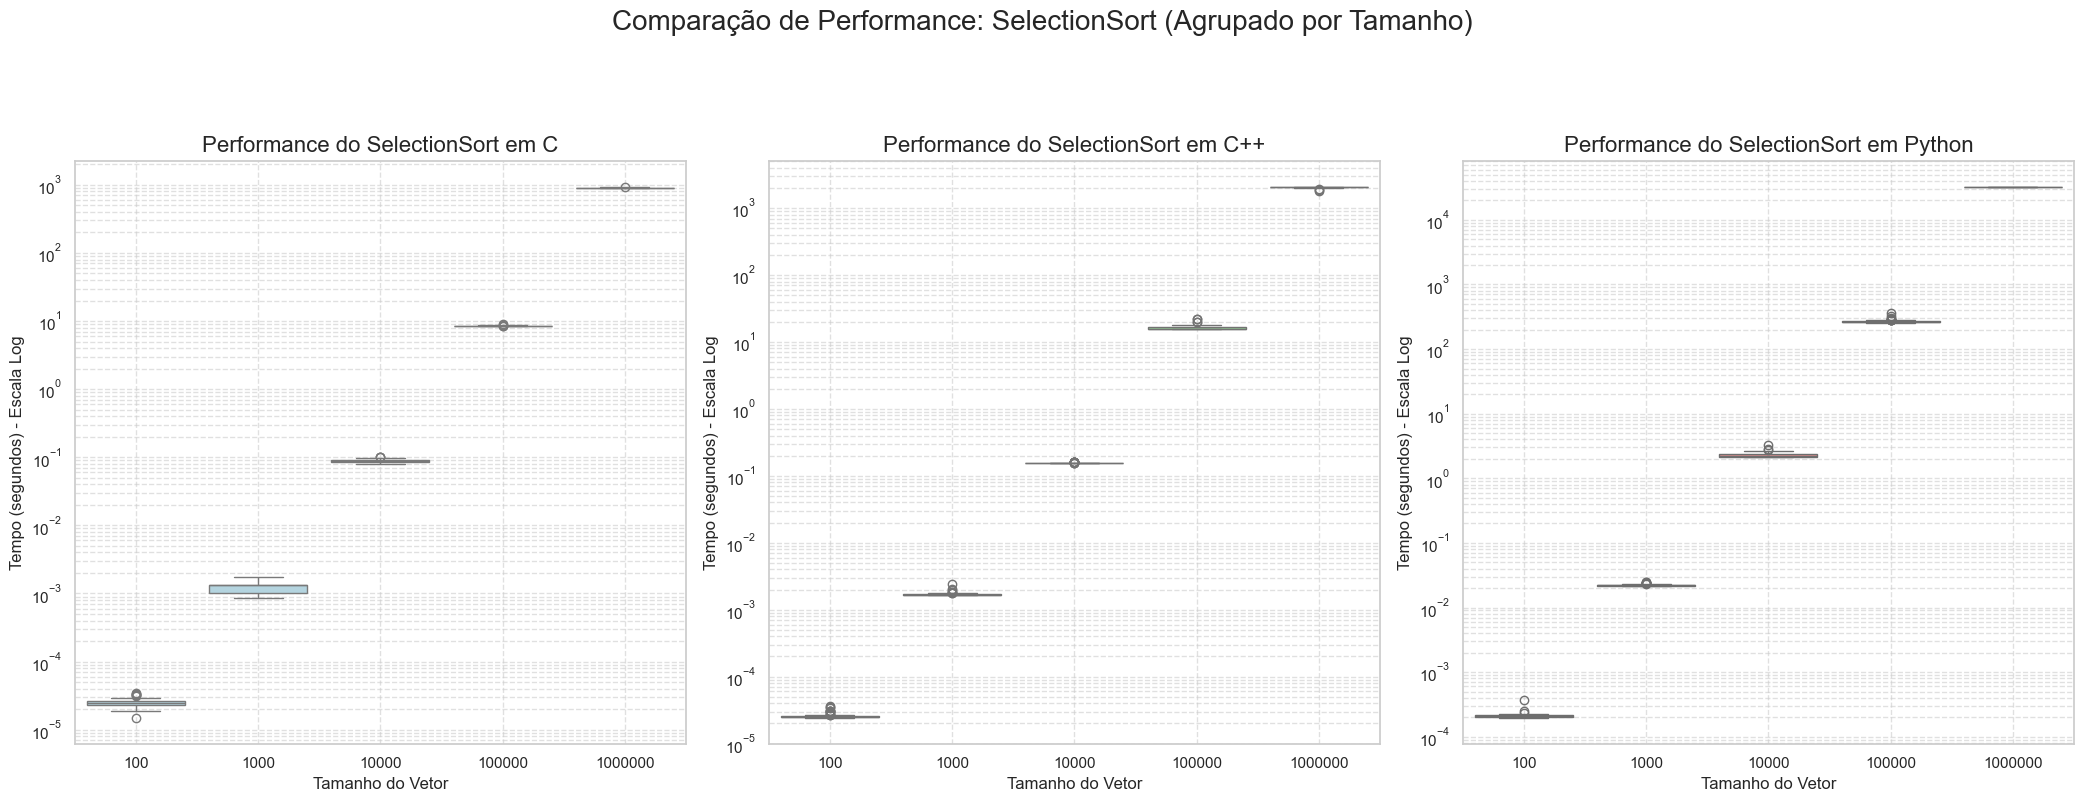

In [16]:
gerar_boxplot_por_algoritmo('SelectionSort', df_completo, salvar_imagem=False)

Iniciando geração de gráfico para o algoritmo: 'BubbleSort'...


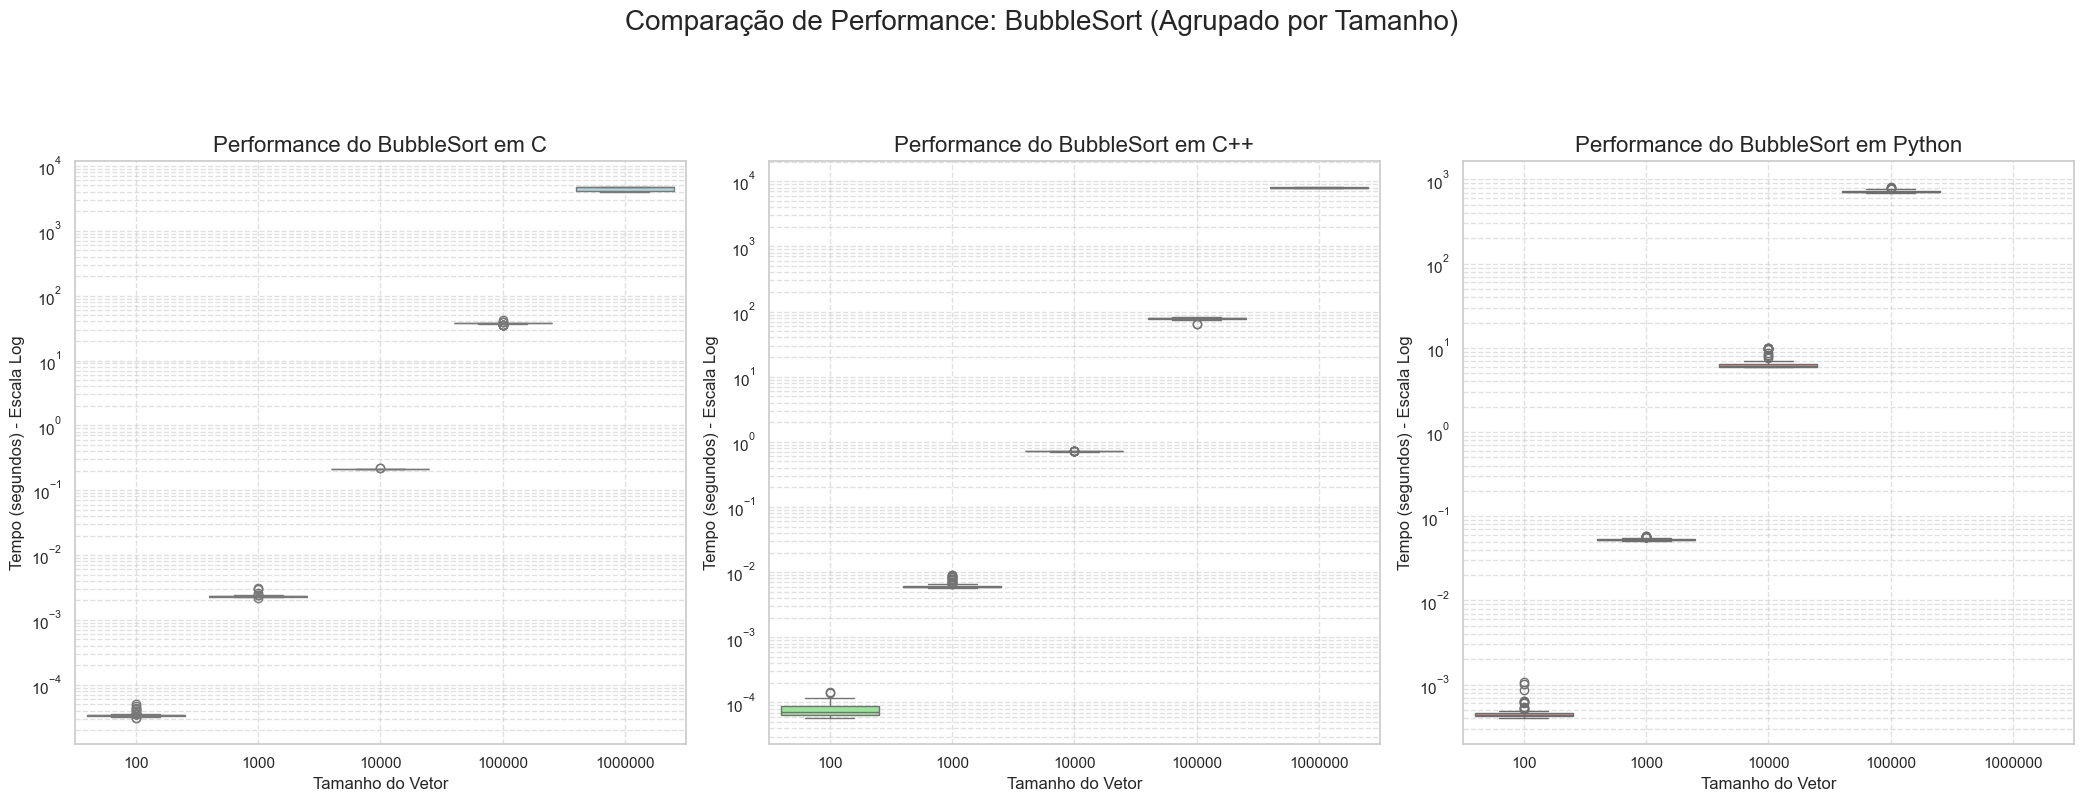

In [17]:
gerar_boxplot_por_algoritmo('BubbleSort', df_completo, salvar_imagem=False)

Iniciando geração de gráfico para o algoritmo: 'InsertionSort'...


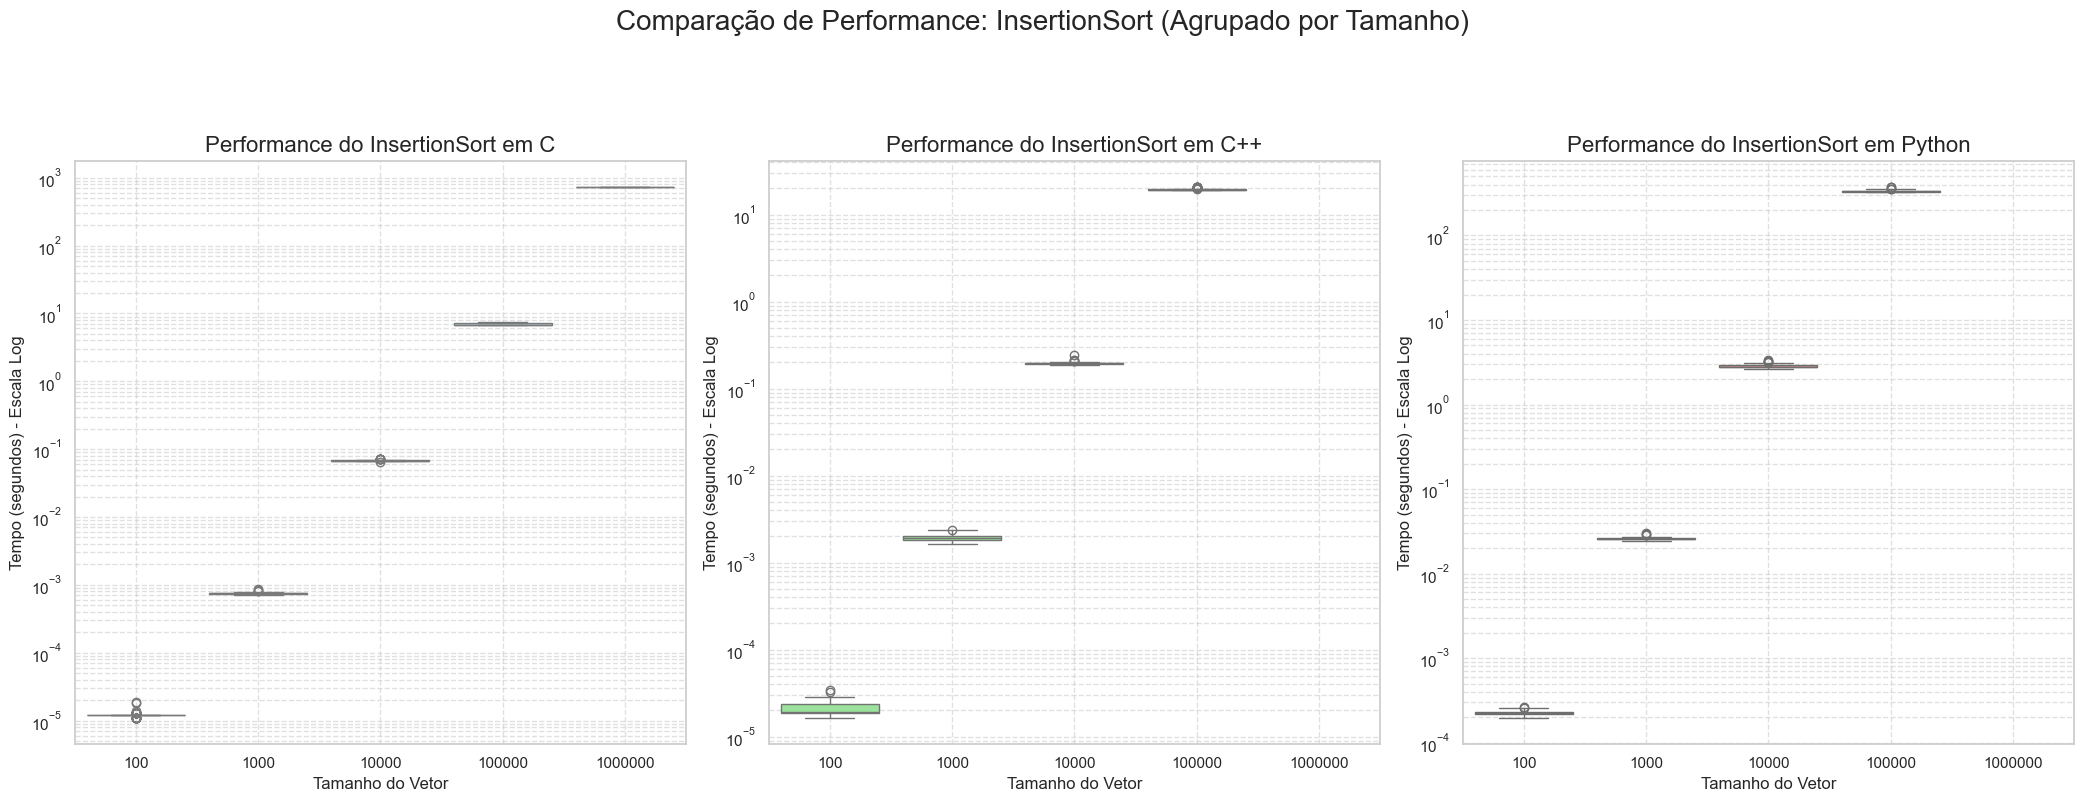

In [18]:
gerar_boxplot_por_algoritmo('InsertionSort', df_completo, salvar_imagem=False)

Iniciando geração de gráfico para o algoritmo: 'HeapSort'...


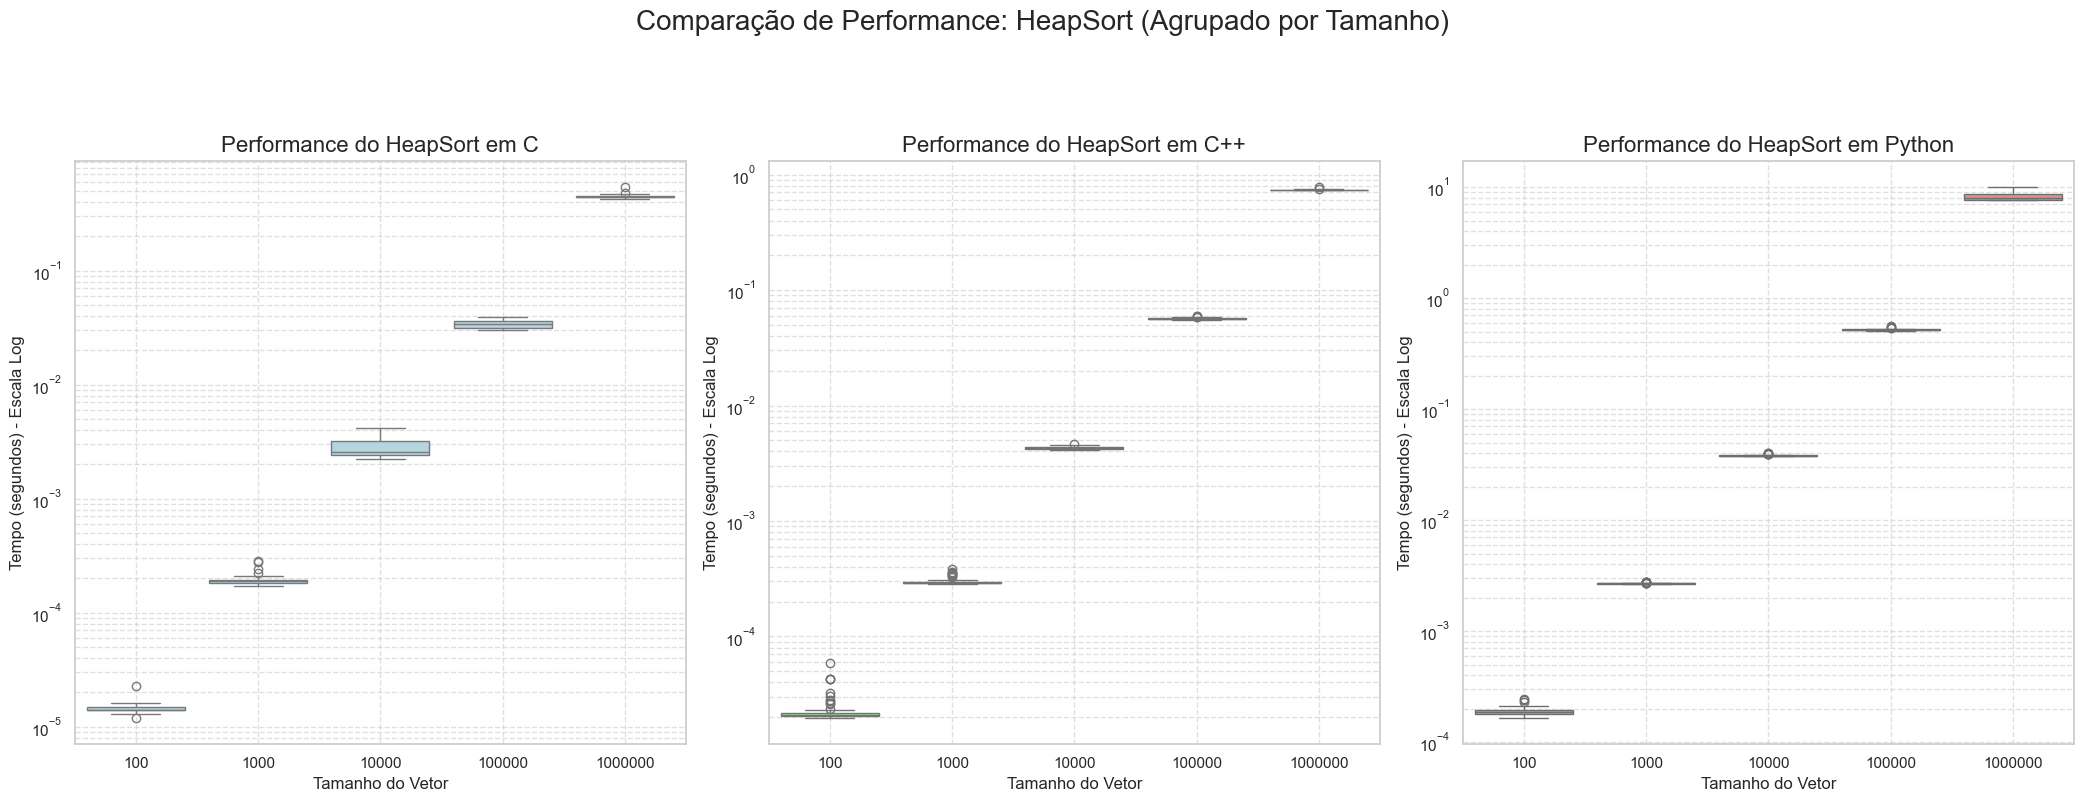

In [19]:
gerar_boxplot_por_algoritmo('HeapSort', df_completo, salvar_imagem=False)

Iniciando geração de gráfico para o algoritmo: 'MergeSort'...


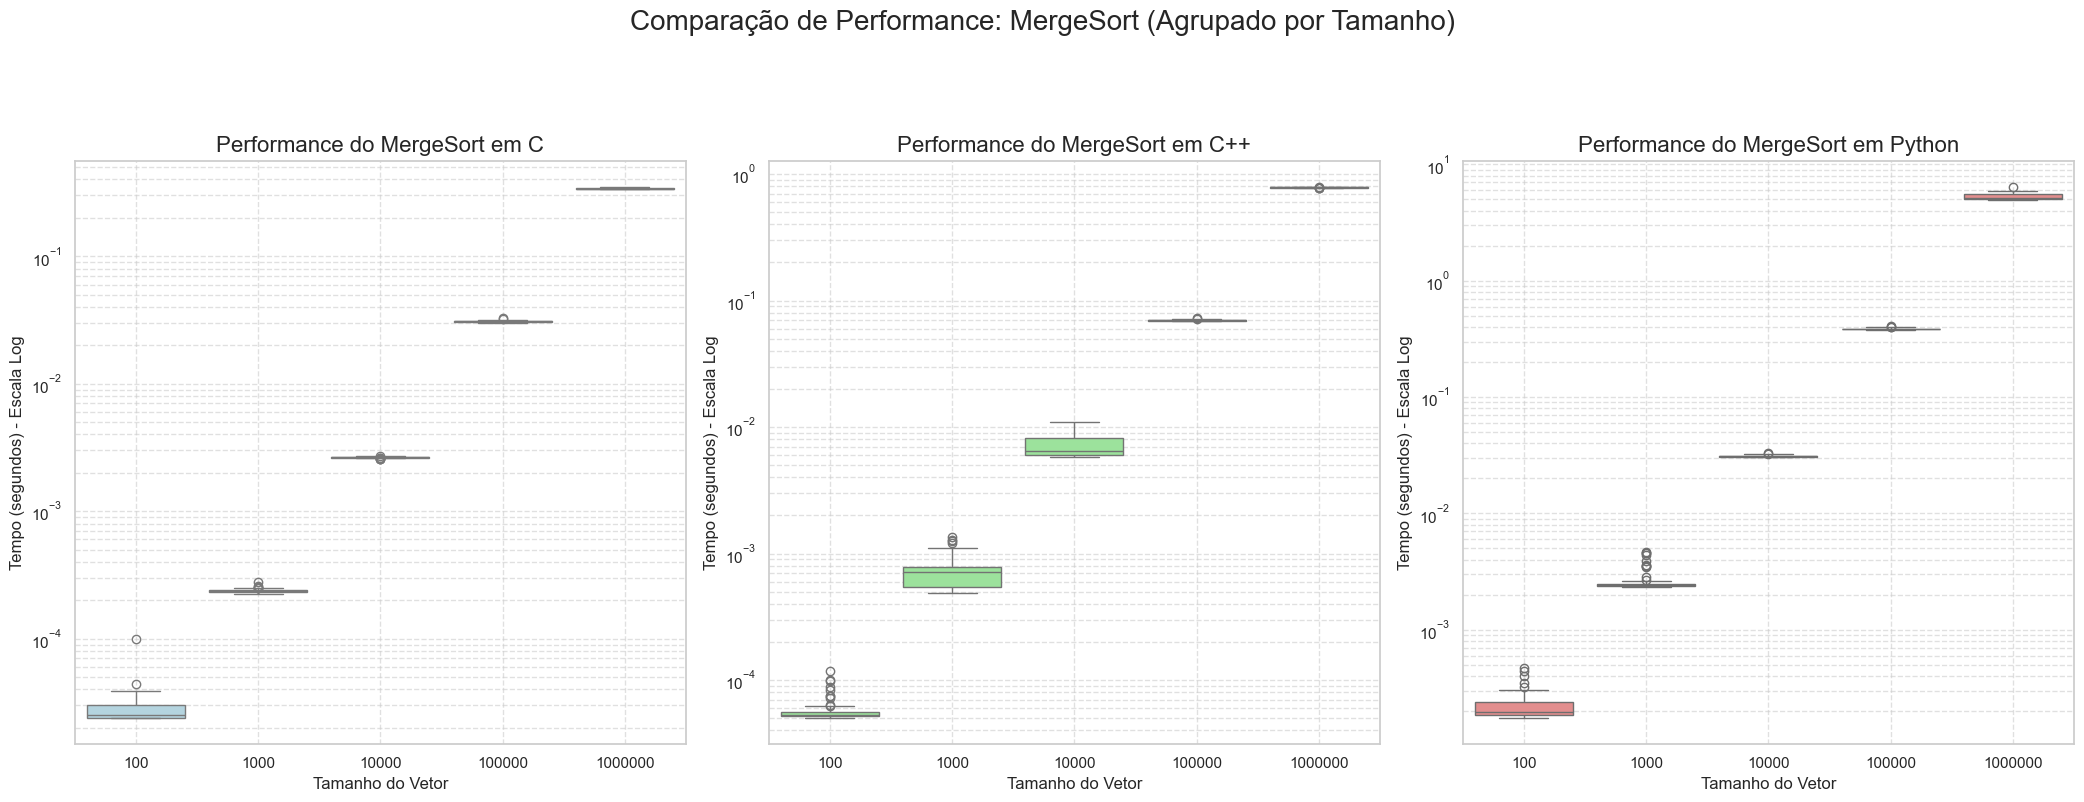

In [20]:
gerar_boxplot_por_algoritmo('MergeSort', df_completo, salvar_imagem=False)

Iniciando geração de gráfico para o algoritmo: 'QuickSort'...


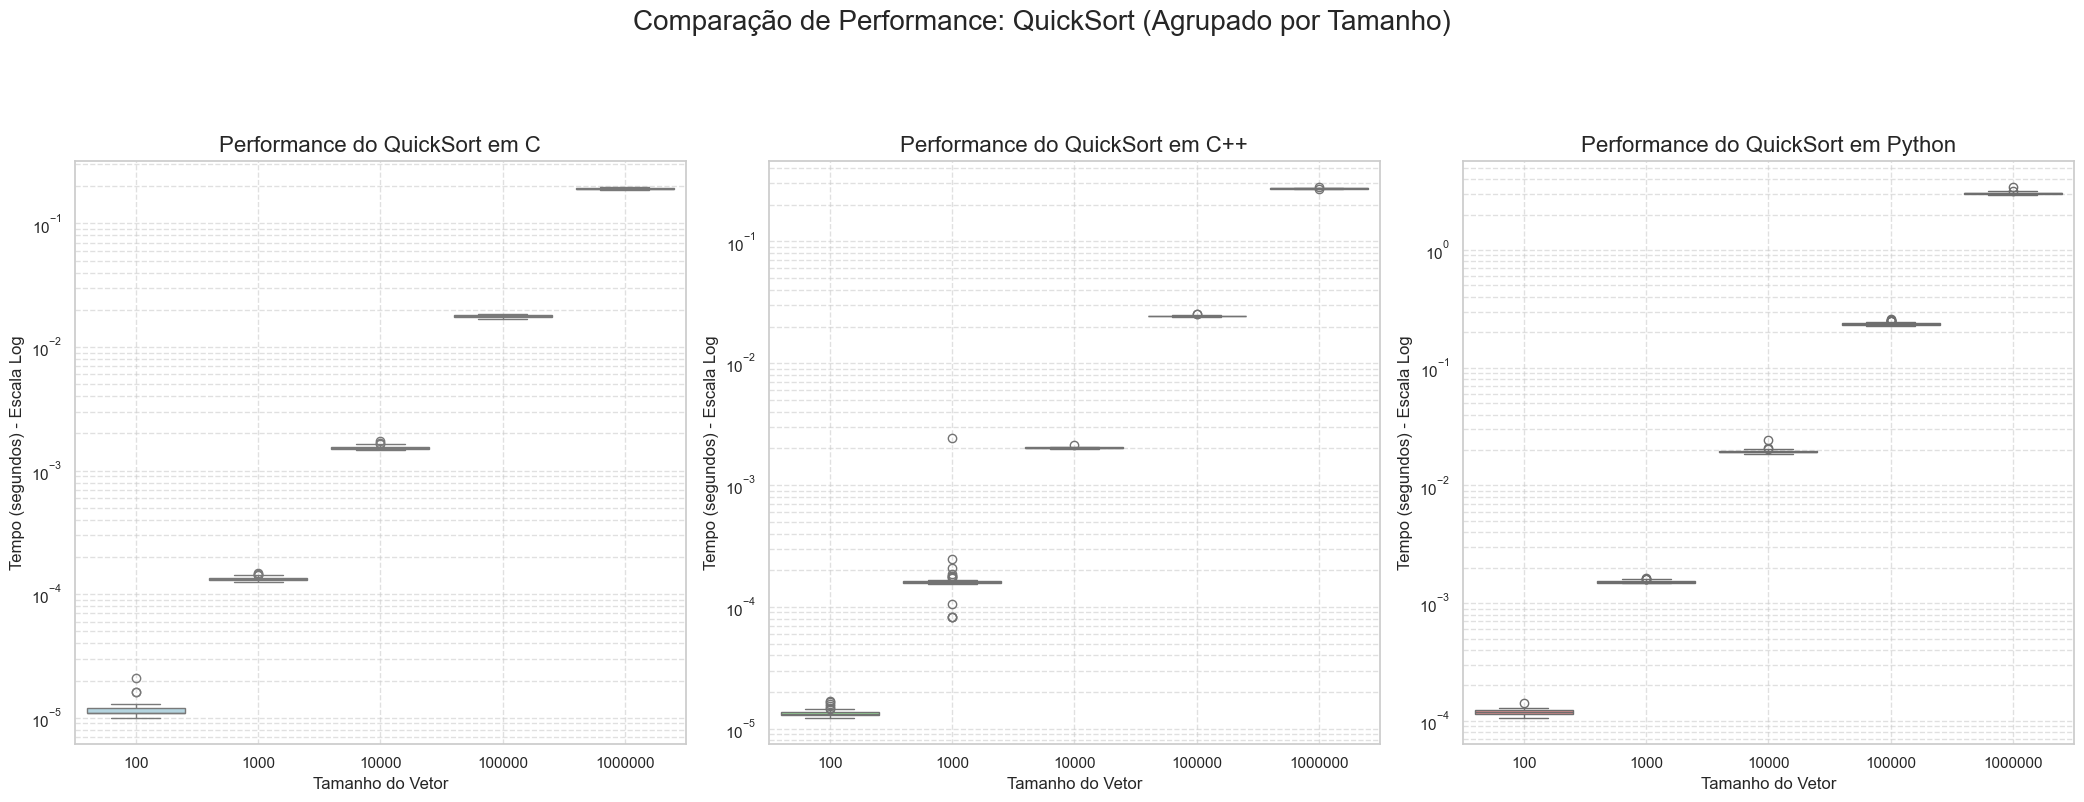

In [21]:
gerar_boxplot_por_algoritmo('QuickSort', df_completo, salvar_imagem=False)

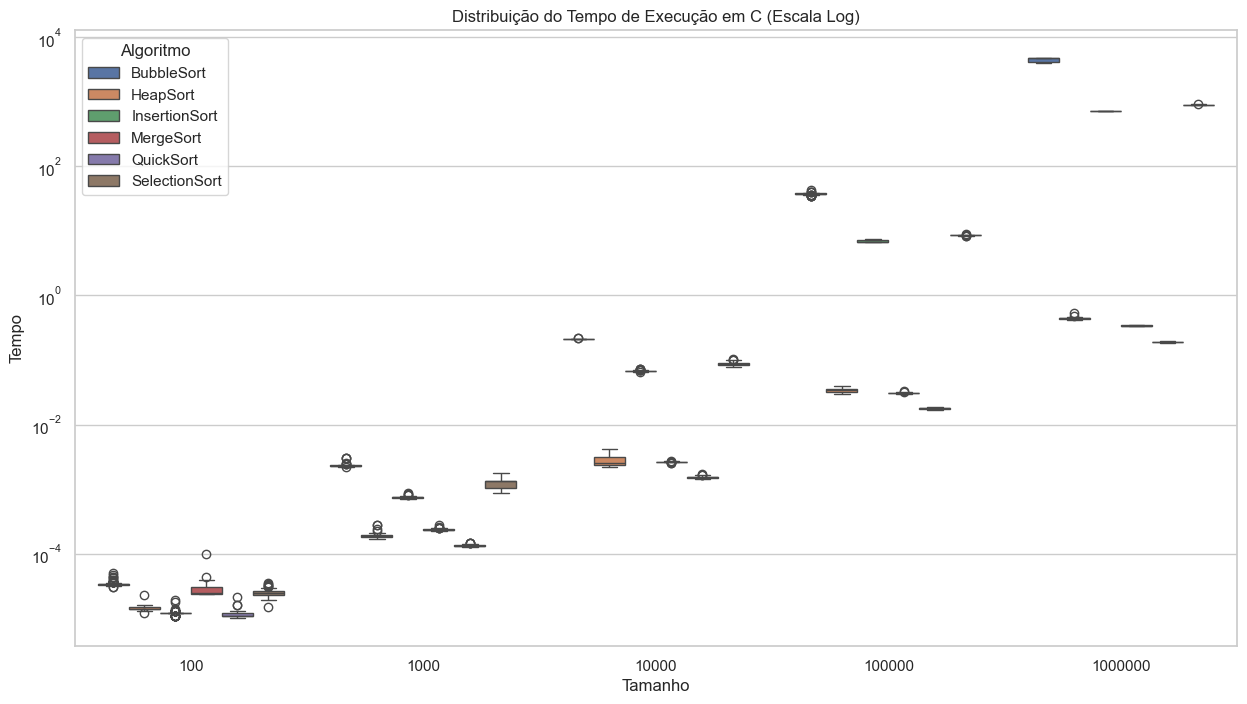

In [22]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_completo[df_completo['Linguagem'] == 'C'], 
              x='Tamanho', y='Tempo', hue='Algoritmo')
plt.yscale('log')
plt.title('Distribuição do Tempo de Execução em C (Escala Log)')
plt.show()

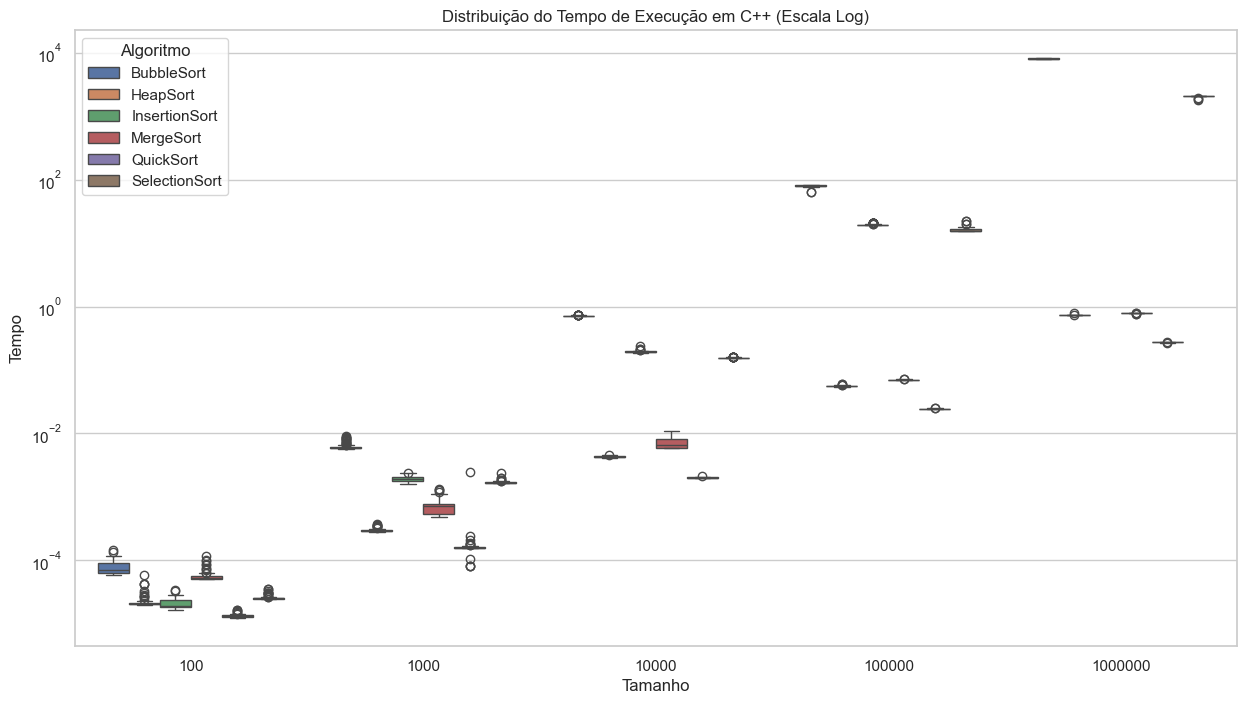

In [23]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_completo[df_completo['Linguagem'] == 'C++'], 
              x='Tamanho', y='Tempo', hue='Algoritmo')
plt.yscale('log')
plt.title('Distribuição do Tempo de Execução em C++ (Escala Log)')
plt.show()

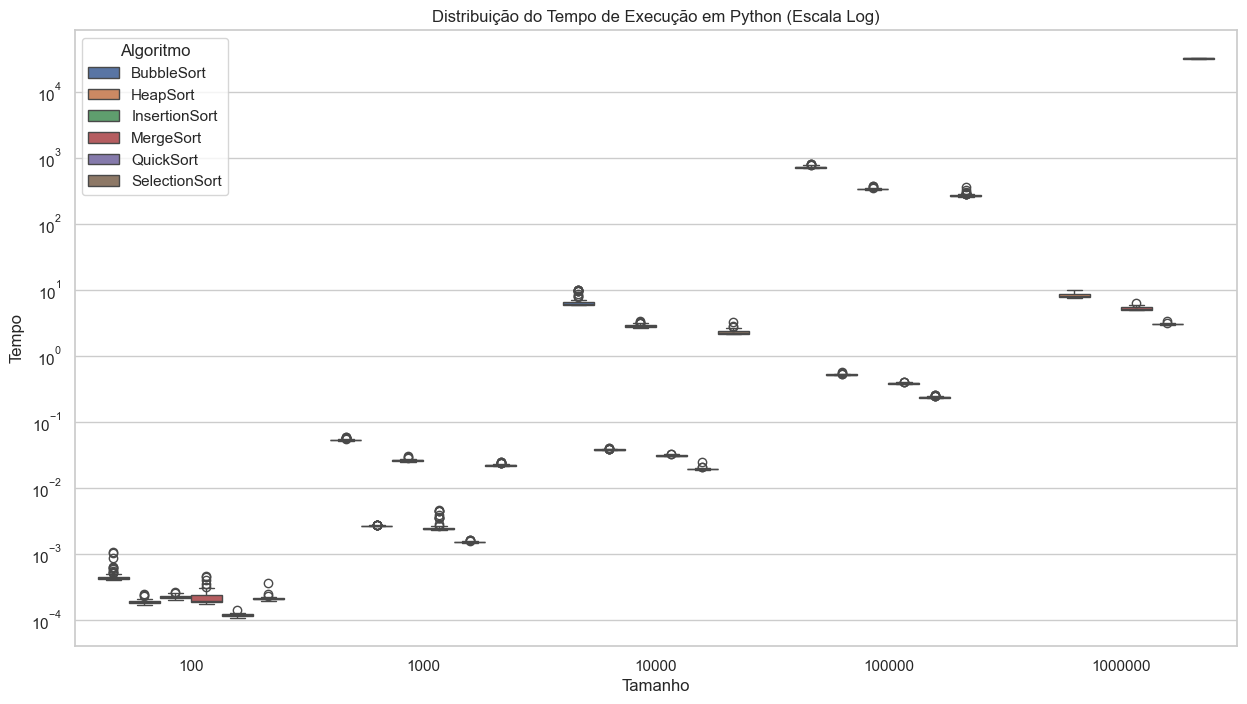

In [24]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_completo[df_completo['Linguagem'] == 'Python'], 
              x='Tamanho', y='Tempo', hue='Algoritmo')
plt.yscale('log')
plt.title('Distribuição do Tempo de Execução em Python (Escala Log)')
plt.show()

Calculando tempos médios...
Ordenando valores...
Calculando Tempo Anterior...
Calculando Fator de Aumento...
Gerando gráficos do Passo 3: Fator de Aumento...


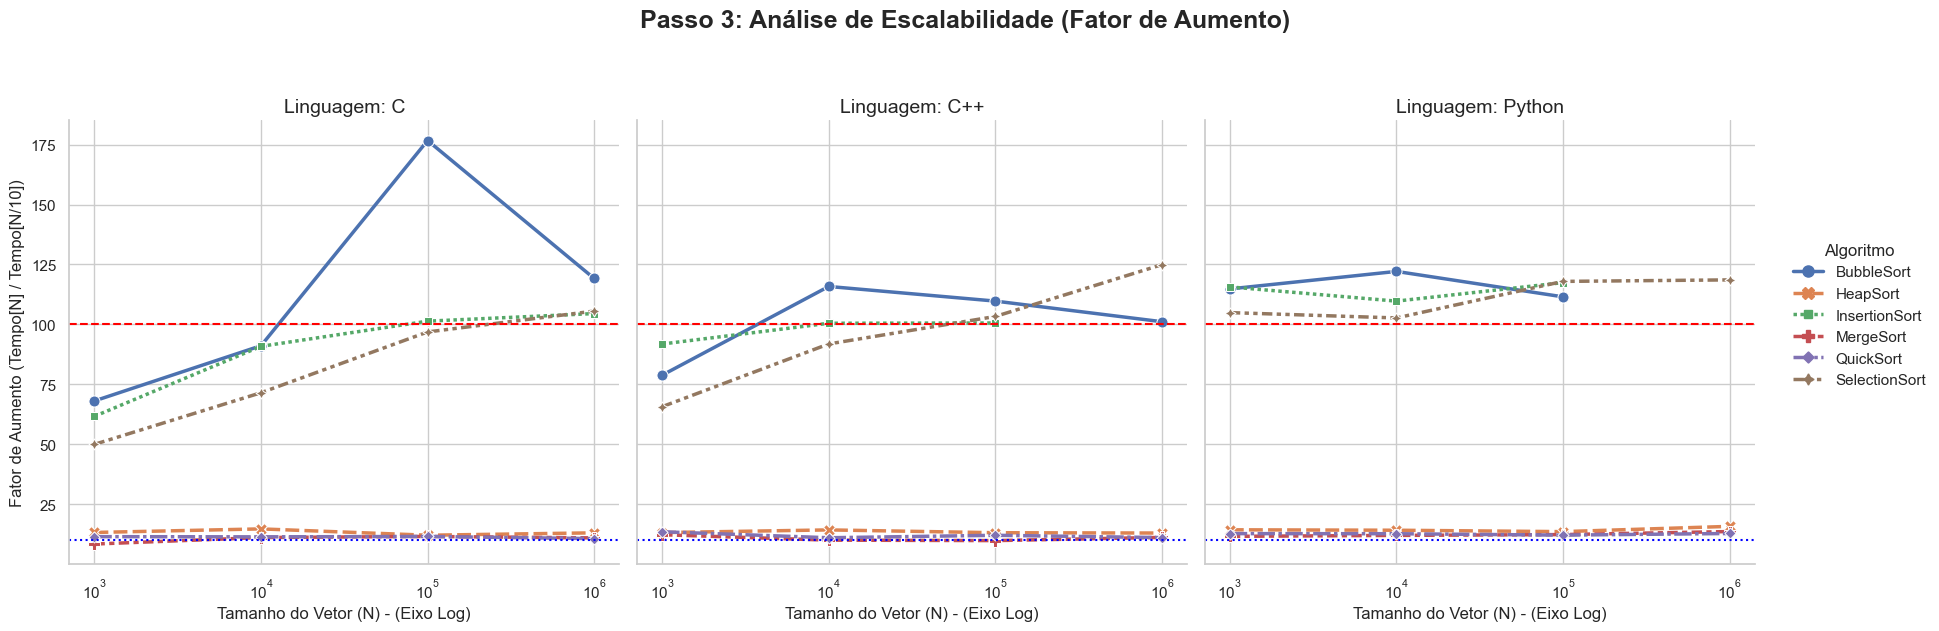

In [25]:
print("Calculando tempos médios...")
df_media = df_completo.groupby(
    ['Linguagem', 'Algoritmo', 'Tamanho']
)['Tempo'].mean().reset_index()

df_media = df_media.rename(columns={'Tempo': 'TempoMedio'})

print("Ordenando valores...")
df_media = df_media.sort_values(by=['Linguagem', 'Algoritmo', 'Tamanho'])

print("Calculando Tempo Anterior...")
df_media['Tempo_Anterior'] = df_media.groupby(
    ['Linguagem', 'Algoritmo']
)['TempoMedio'].shift(1)

print("Calculando Fator de Aumento...")
df_media['FatorDeAumento'] = df_media['TempoMedio'] / df_media['Tempo_Anterior']


print("Gerando gráficos do Passo 3: Fator de Aumento...")

df_plot_fator = df_media.dropna(subset=['FatorDeAumento'])

sns.set_theme(style="whitegrid")

g = sns.relplot(
    data=df_plot_fator,
    x='Tamanho',            # Eixo X: Tamanho (1k, 10k, 100k)
    y='FatorDeAumento',   # Eixo Y: O fator (ex: 100x, 12x)
    hue='Algoritmo',        # Cor para cada algoritmo
    style='Algoritmo',      # Estilo de linha para cada algoritmo
    col='Linguagem',        # Um gráfico (coluna) para cada linguagem
    kind='line',            # Tipo de gráfico
    lw=2.5,                 # Grossura da linha
    markers=True,           # Adiciona marcadores nos pontos
    markersize=8,           # Tamanho dos marcadores
    height=6,               # Altura
    aspect=1                # Proporção
)


g.set(xscale='log') 

g.set_axis_labels('Tamanho do Vetor (N) - (Eixo Log)', 'Fator de Aumento (Tempo[N] / Tempo[N/10])')
g.set_titles("Linguagem: {col_name}", size=14)
g.fig.suptitle('Passo 3: Análise de Escalabilidade (Fator de Aumento)', 
                 y=1.05, fontsize=18, weight='bold')

for ax in g.axes.flat:
    ax.axhline(100, ls='--', color='red', lw=1.5, label='Complexidade O(N^2) teórica (100x)')
    ax.axhline(10, ls=':', color='blue', lw=1.5, label='Referência O(N) (10x)')

g.tight_layout()

plt.show()

# Para salvar a imagem (opcional)
# g.savefig('escalabilidade_fator_aumento.png', dpi=300)